<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="https://github.com/dd-consulting">
         <img src="../reference/GZ_logo.png" width="60" align="right">
    </a>
    <h1>
        One-Stop Analytics: Predictive Modeling (Regression Models)
    </h1>
</div>


# Case Study of Autism Spectrum Disorder (ASD) with R

---

<img src="../reference/CDC_ASD/CDC_ASD_01.jpg" align="left">

<img src="../reference/CDC_ASD/CDC_ASD_02.png" width="700" align="center">


## <span style="color:blue">[ United States ]</span> 

## Centers for Disease Control and Prevention (CDC) - Autism Spectrum Disorder (ASD)

Autism spectrum disorder (ASD) is a developmental disability that can cause significant social, communication and behavioral challenges. CDC is committed to continuing to provide essential data on ASD, search for factors that put children at risk for ASD and possible causes, and develop resources that help identify children with ASD as early as possible.

https://www.cdc.gov/ncbddd/autism/data/index.html


## <span style="color:blue">[ Singapore ]</span> 

## TODAY Online - More preschoolers diagnosed with developmental issues

Doctors cited better awareness among parents and preschool teachers, leading to early referrals for diagnosis.

https://www.todayonline.com/singapore/more-preschoolers-diagnosed-developmental-issues

<img src="../reference/SG_ASD/SG_ASD_01.png" width="650" align="left">



<img src="../reference/SG_ASD/SG_ASD_04.png" align="left"> 

https://www.pathlight.org.sg/

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="" width="60" align="right">
    </a>
</div>


# Workshop Objective: 

## Use R to predict Autism Spectrum Disorder (ASD) prevalence. 

https://www.cdc.gov/ncbddd/autism/data/index.html

* ## Linear Model: Simple Linear Regression (SLR)

* ## Linear Model: Multiple Linear Regression (MLR)

* ## Linear Model: Polynomial Regression (PLR)

* ## Linear Model: Logistic Regression (LR)

* ## Linear Model: Model Evaluation: Train/Test, K-Fold Cross Validation, Confusion Matrix

* ## Linear Model: Prevent Overfitting by Regularization Methods

* ## Workshop Submission

* ## Appendices

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="" width="750" align="center">
    </a>
</div>



In [1]:
if(!require(repr)){install.packages("repr")}
library("repr") # Show graphs in-line notebook

Loading required package: repr


**Obtain current R <span style="color:blue">working directory</span>**

In [2]:
getwd()

[1] "/media/sf_vm_shared_folder/git/DDC-ASD/model_R"

**Set new R working directory**

In [3]:
# setwd("/media/sf_vm_shared_folder/git/DDC/DDC-ASD/model_R")
# setwd('~/Desktop/admin-desktop/vm_shared_folder/git/DDC-ASD/model_R')
getwd()

[1] "/media/sf_vm_shared_folder/git/DDC-ASD/model_R"

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="" width="750" align="center">
    </a>
</div>



## <span style="color:blue">Linear Model: Simple Linear Regression (SLR)</span>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Linear Model: Simple Linear Regression (SLR) - Workshop Task
    </h3>
</div>


**Workshop Task:**

1. a.	Graph the data in a scatterplot to determine if there is a possible linear relationship.

2. b.	Compute and interpret the linear correlation coefficient, r.

3. c.	Determine the regression equation for the data.

4. d.	Graph the regression equation and the data points.

5. e.	Identify potential influential observations (outliers).

6. f.	At the 5% significance level, do the data provide sufficient evidence to conclude that the slope of the population regression line is not 0 and, hence, that [ Year ] is useful as a predictor of ASD [ Prevalence ]?

7. g.	Obtain the residuals and create a residual plot. Decide whether it is reasonable to consider that the assumptions for regression analysis are met by the variables in questions.

8. h.	Compute and interpret the coefficient of determination, $R^2$.

9. i.	Find the predicted ASD Prevalence of future Year.

10. j.	Determine a 95% confidence interval for the predicted ASD Prevalence.


**Use Case Data: <span style="color:blue">"../dataset/ADV_ASD_State_R.csv"</span>**

**Read in CSV data, storing as R <span style="color:blue">dataframe</span>**

In [4]:
# Read back in above saved file:
ASD_State <- read.csv("../dataset/ADV_ASD_State_R.csv")
# Convert Year_Factor to ordered.factor
ASD_State$Year_Factor <- factor(ASD_State$Year_Factor, ordered = TRUE) 
ASD_State$Prevalence_Risk2 = factor(ASD_State$Prevalence_Risk2, ordered=TRUE, 
                                    levels=c("Low", "High"))
ASD_State$Prevalence_Risk4 = factor(ASD_State$Prevalence_Risk4, ordered=TRUE, 
                                    levels=c("Low", "Medium", "High", "Very High"))


In [5]:
head(ASD_State)

State Denominator Prevalence Lower.CI Upper.CI Year Source
1 AZ    45322       6.5        5.8       7.3     2000 addm  
2 GA    43593       6.5        5.8       7.3     2000 addm  
3 MD    21532       5.5        4.6       6.6     2000 addm  
4 NJ    29714       9.9        8.9      11.1     2000 addm  
5 SC    24535       6.3        5.4       7.4     2000 addm  
6 WV    23065       4.5        3.7       5.5     2000 addm  
  Source_Full1                                           State_Full1   
1 Autism & Developmental Disabilities Monitoring Network Arizona       
2 Autism & Developmental Disabilities Monitoring Network Georgia       
3 Autism & Developmental Disabilities Monitoring Network Maryland      
4 Autism & Developmental Disabilities Monitoring Network New Jersey    
5 Autism & Developmental Disabilities Monitoring Network South Carolina
6 Autism & Developmental Disabilities Monitoring Network West Virginia 
  State_Full2       ... Hispanic.Upper.CI Asian.or.Pacific.Islander.Prevalence
1 AZ-Arizona        ... NA                NA                                  
2 GA-Georgia        ... NA                NA                                  
3 MD-Maryland       ... NA                NA                                  
4 NJ-New Jersey     ... NA                NA                                  
5 SC-South Carolina ... NA                NA                                  
6 WV-West Virginia  ... NA                NA                                  
  Asian.or.Pacific.Islander.Lower.CI Asian.or.Pacific.Islander.Upper.CI
1 NA                                 NA                                
2 NA                                 NA                                
3 NA                                 NA                                
4 NA                                 NA                                
5 NA                                 NA                                
6 NA                                 NA                                
  State_Region       Source_UC
1 D8 Mountain        ADDM     
2 D5 South Atlantic  ADDM     
3 D5 South Atlantic  ADDM     
4 D2 Middle Atlantic ADDM     
5 D5 South Atlantic  ADDM     
6 D5 South Atlantic  ADDM     
  Source_Full3                                                Prevalence_Risk2
1 ADDM Autism & Developmental Disabilities Monitoring Network High            
2 ADDM Autism & Developmental Disabilities Monitoring Network High            
3 ADDM Autism & Developmental Disabilities Monitoring Network High            
4 ADDM Autism & Developmental Disabilities Monitoring Network High            
5 ADDM Autism & Developmental Disabilities Monitoring Network High            
6 ADDM Autism & Developmental Disabilities Monitoring Network Low             
  Prevalence_Risk4 Year_Factor
1 Medium           2000       
2 Medium           2000       
3 Medium           2000       
4 Medium           2000       
5 Medium           2000       
6 Low              2000

In [6]:
# Filter [ Source: ADDM ], including only two clomuns for SLR:
# Dependent variable: Prevalence
# independent variable: Year
ASD_State_4_SLR = subset(ASD_State, Source_UC == 'ADDM', select = c(Prevalence, Year))
#
dim(ASD_State_4_SLR)
head(ASD_State_4_SLR)

[1] 86  2

Prevalence Year
1 6.5        2000
2 6.5        2000
3 5.5        2000
4 9.9        2000
5 6.3        2000
6 4.5        2000

---

**SLR Workshop Task: <span style="color:blue">1. a. Graph the data in a scatterplot to determine if there is a possible linear relationship.</span>**

In [7]:
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=4)

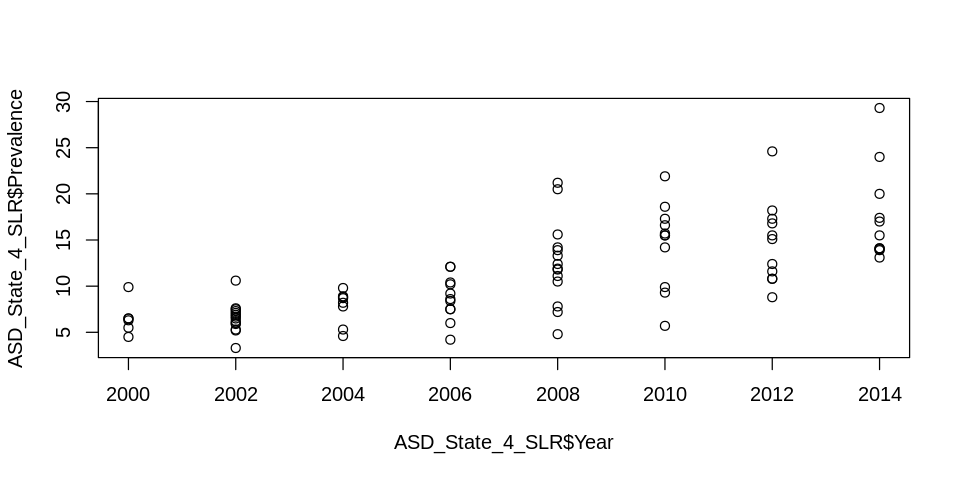

In [8]:
plot(ASD_State_4_SLR$Year, ASD_State_4_SLR$Prevalence)

---

**SLR Workshop Task: <span style="color:blue">2. b. Compute and interpret the linear correlation coefficient, r.</span>**

Compute correlaion coefficient

In [9]:
cor(ASD_State_4_SLR$Year, ASD_State_4_SLR$Prevalence)

[1] 0.7224098

Apply correlation test (two tail: != 0)

In [10]:
cor.test(ASD_State_4_SLR$Year, ASD_State_4_SLR$Prevalence)


	Pearson's product-moment correlation

data:  ASD_State_4_SLR$Year and ASD_State_4_SLR$Prevalence
t = 9.5753, df = 84, p-value = 4.13e-15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6027995 0.8102653
sample estimates:
      cor 
0.7224098 


Apply correlation test (one tail: > 0)

In [11]:
cor.test(ASD_State_4_SLR$Year, ASD_State_4_SLR$Prevalence, alternative = "greater")


	Pearson's product-moment correlation

data:  ASD_State_4_SLR$Year and ASD_State_4_SLR$Prevalence
t = 9.5753, df = 84, p-value = 2.065e-15
alternative hypothesis: true correlation is greater than 0
95 percent confidence interval:
 0.6243611 1.0000000
sample estimates:
      cor 
0.7224098 


---

**SLR Workshop Task: <span style="color:blue">3. c. Determine the regression equation for the data.</span>**

In [12]:
fit_model = lm(formula = Prevalence ~ Year, data = ASD_State_4_SLR)
print(fit_model)


Call:
lm(formula = Prevalence ~ Year, data = ASD_State_4_SLR)

Coefficients:
(Intercept)         Year  
 -1737.8464       0.8714  



---

**SLR Workshop Task: <span style="color:blue">4. d. Graph the regression equation and the data points.</span>**

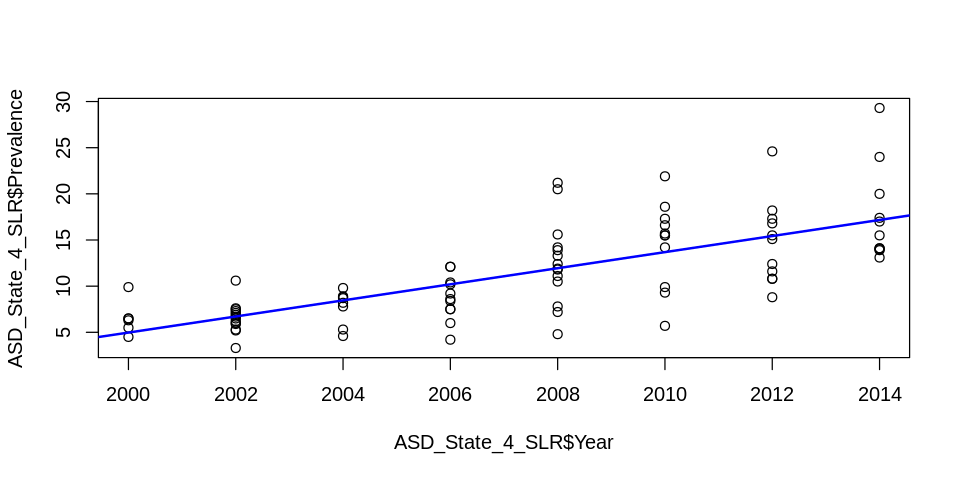

In [13]:
plot(ASD_State_4_SLR$Year, ASD_State_4_SLR$Prevalence)
abline(fit_model, col="blue", lwd=2)

---

**SLR Workshop Task: <span style="color:blue">5. e. Identify potential influential observations (outliers).</span>**

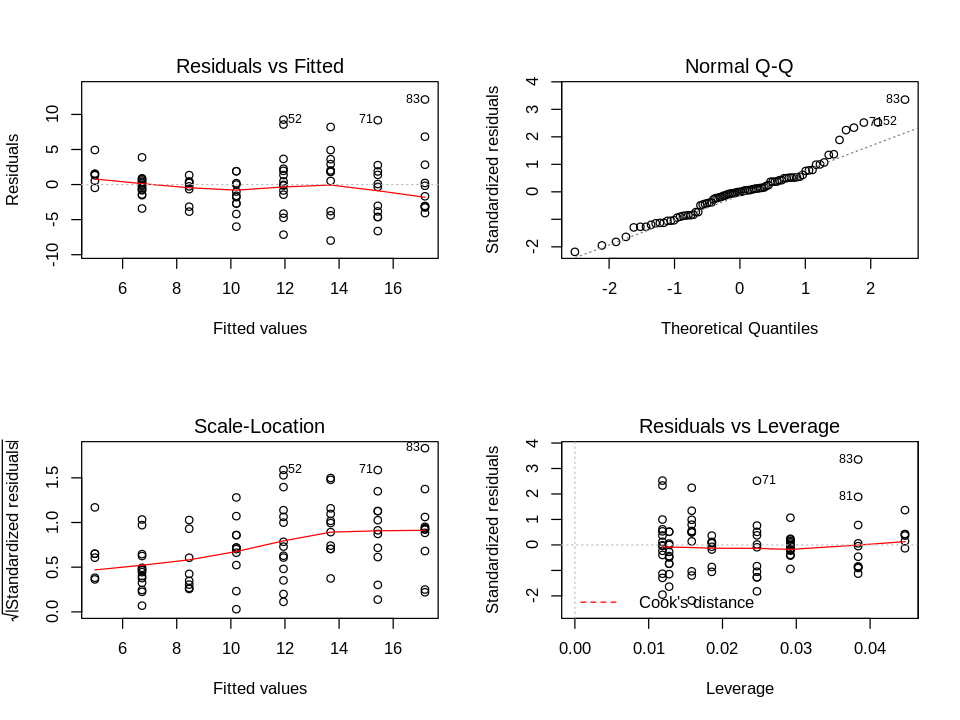

In [14]:
# library(repr)
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=6)
par(mfrow=c(2, 2)) 
plot(fit_model)
par(mfrow=c(1, 1))

**<span style="color:blue">[ Tips ]</span> We notice:**

* Based on **Residual vs Leverage** chart, there seems no potential influential observations (outliers)


---

**SLR Workshop Task: <span style="color:blue">6. f. At the 5% significance level, do the data provide sufficient evidence to conclude that the slope of the population regression line is not 0 and, hence, that [ Year ] is useful as a predictor of ASD [ Prevalence ]?</span>**

In [15]:
summary(fit_model)


Call:
lm(formula = Prevalence ~ Year, data = ASD_State_4_SLR)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9888 -2.7032 -0.0104  1.7397 12.1255 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.738e+03  1.827e+02  -9.513 5.51e-15 ***
Year         8.714e-01  9.101e-02   9.575 4.13e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.688 on 84 degrees of freedom
Multiple R-squared:  0.5219,	Adjusted R-squared:  0.5162 
F-statistic: 91.69 on 1 and 84 DF,  p-value: 4.13e-15


**<span style="color:blue">[ Tips ]</span> We notice:**

2. F-test's p-value is 4.13e-15, which is smaller than 0.05, thus above 95% confidence.

---

**SLR Workshop Task: <span style="color:blue">7. g.	Obtain the residuals and create a residual plot. Decide whether it is reasonable to consider that the assumptions for regression analysis are met by the variables in questions.</span>**

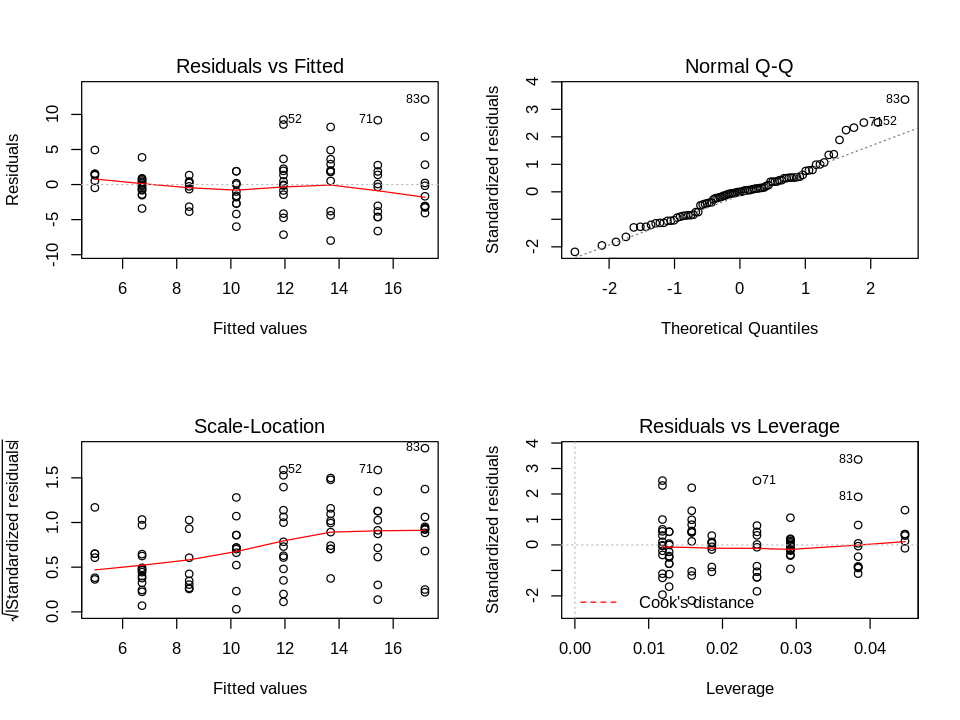

In [16]:
# library(repr)
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=6)
par(mfrow=c(2, 2)) 
plot(fit_model)
par(mfrow=c(1, 1))

**<span style="color:blue">[ Tips ]</span> We notice:**

* Based on **Residual vs Fitted, Sacle-Location, and Normal Q-Q** charts, the residuals (vs fitted) are following linear assumption, with slightly "fan-shape" at larger Year values (Heteroscedasticity). https://statisticsbyjim.com/regression/heteroscedasticity-regression/

* We are to explore polynomial regression method for this issue later.

---

**SLR Workshop Task: <span style="color:blue">8. h.	Compute and interpret the coefficient of determination, $R^2$.</span>**

In [17]:
summary(fit_model)


Call:
lm(formula = Prevalence ~ Year, data = ASD_State_4_SLR)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9888 -2.7032 -0.0104  1.7397 12.1255 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.738e+03  1.827e+02  -9.513 5.51e-15 ***
Year         8.714e-01  9.101e-02   9.575 4.13e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.688 on 84 degrees of freedom
Multiple R-squared:  0.5219,	Adjusted R-squared:  0.5162 
F-statistic: 91.69 on 1 and 84 DF,  p-value: 4.13e-15


**<span style="color:blue">[ Tips ]</span> We notice:**

* $R^2$ is  0.5219

* Adjusted $R^2$ is  0.5162

---

**SLR Workshop Task: <span style="color:blue">9. i.	Find the predicted ASD Prevalence of future Year.</span>**

In [18]:
future_year = 2025
newdata = data.frame(Year = future_year) 
predict(fit_model,newdata)
#
cat("Predicted ASD Prevalence of Year [", future_year, "] is", round(predict(fit_model,newdata), 1), "per 1,000 Children")


1 
26.75998

Predicted ASD Prevalence of Year [ 2025 ] is 26.8 per 1,000 Children

---

**SLR Workshop Task: <span style="color:blue">10. j.	Determine a 95% confidence interval for the predicted ASD Prevalence.</span>**

In [19]:
predict(fit_model, newdata, interval = "predict")

fit      lwr      upr     
1 26.75998 18.72351 34.79645

In [20]:
cat("\nPredicted ASD Prevalence of Year [", future_year, "] (95% Upper CI) is", 
    round(predict(fit_model,newdata, interval = "predict")[3], 1), "per 1,000 Children")

cat("\nPredicted ASD Prevalence of Year [", future_year, "] (95% Lower CI) is", 
    round(predict(fit_model,newdata, interval = "predict")[2], 1), "per 1,000 Children")



Predicted ASD Prevalence of Year [ 2025 ] (95% Upper CI) is 34.8 per 1,000 Children
Predicted ASD Prevalence of Year [ 2025 ] (95% Lower CI) is 18.7 per 1,000 Children

---

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
    <h3>
        Quiz:
    </h3>
    <p>
        Create Prevalence ~ Year SLR model for Data Source: SPED
    </p>
</div>

In [21]:
# Write your code below and press Shift+Enter to execute 


Double-click <b>here</b> for the solution.

<!-- The answer is below:

# Write your code below and press Shift+Enter to execute 
ASD_State_4_SLR = subset(ASD_State, Source_UC == 'SPED', select = c(Prevalence, Year))
ASD_State_4_SLR = subset(ASD_State, Source_UC == 'NSCH', select = c(Prevalence, Year))
ASD_State_4_SLR = subset(ASD_State, Source_UC == 'MEDI', select = c(Prevalence, Year))
ASD_State_4_SLR = subset(ASD_State, select = c(Prevalence, Year))

-->

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="" width="750" align="center">
    </a>
</div>



## <span style="color:blue">Linear Model: Multiple Linear Regression (MLR)</span>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Linear Model: Multiple Linear Regression (MLR) - Workshop Task
    </h3>
</div>


**Workshop Task:**

1. a.	Get the data.

2. b.	Discover and visualize the data to gain insights (Is there missing Value in the dataframe, then how to deal with the missing value)

3. c.	Visualize Data and trends

4. d.	Compute correlation between variables and apply multiple regression.

5. e.	Check multicollinearity, then how to remove multicollinearity.

6. f.	How is your ﬁnal model looks like?


**MLR Workshop Task: <span style="color:blue">1. a. Get the data.</span>**

**Use Case Data: <span style="color:blue">"../dataset/ADV_ASD_State_R.csv"</span>**

**Read in CSV data, storing as R <span style="color:blue">dataframe</span>**

In [22]:
# Read back in above saved file:
# ASD_State <- read.csv("../dataset/ADV_ASD_State_R.csv")
# ASD_State$Year_Factor <- factor(ASD_State$Year_Factor, ordered = TRUE) # Convert Year_Factor to ordered.factor
# ASD_State$Prevalence_Risk2 = factor(ASD_State$Prevalence_Risk2, ordered=TRUE, levels=c("Low", "High"))
# ASD_State$Prevalence_Risk4 = factor(ASD_State$Prevalence_Risk4, ordered=TRUE, levels=c("Low", "Medium", "High", "Very High"))


In [23]:
head(ASD_State)

State Denominator Prevalence Lower.CI Upper.CI Year Source
1 AZ    45322       6.5        5.8       7.3     2000 addm  
2 GA    43593       6.5        5.8       7.3     2000 addm  
3 MD    21532       5.5        4.6       6.6     2000 addm  
4 NJ    29714       9.9        8.9      11.1     2000 addm  
5 SC    24535       6.3        5.4       7.4     2000 addm  
6 WV    23065       4.5        3.7       5.5     2000 addm  
  Source_Full1                                           State_Full1   
1 Autism & Developmental Disabilities Monitoring Network Arizona       
2 Autism & Developmental Disabilities Monitoring Network Georgia       
3 Autism & Developmental Disabilities Monitoring Network Maryland      
4 Autism & Developmental Disabilities Monitoring Network New Jersey    
5 Autism & Developmental Disabilities Monitoring Network South Carolina
6 Autism & Developmental Disabilities Monitoring Network West Virginia 
  State_Full2       ... Hispanic.Upper.CI Asian.or.Pacific.Islander.Prevalence
1 AZ-Arizona        ... NA                NA                                  
2 GA-Georgia        ... NA                NA                                  
3 MD-Maryland       ... NA                NA                                  
4 NJ-New Jersey     ... NA                NA                                  
5 SC-South Carolina ... NA                NA                                  
6 WV-West Virginia  ... NA                NA                                  
  Asian.or.Pacific.Islander.Lower.CI Asian.or.Pacific.Islander.Upper.CI
1 NA                                 NA                                
2 NA                                 NA                                
3 NA                                 NA                                
4 NA                                 NA                                
5 NA                                 NA                                
6 NA                                 NA                                
  State_Region       Source_UC
1 D8 Mountain        ADDM     
2 D5 South Atlantic  ADDM     
3 D5 South Atlantic  ADDM     
4 D2 Middle Atlantic ADDM     
5 D5 South Atlantic  ADDM     
6 D5 South Atlantic  ADDM     
  Source_Full3                                                Prevalence_Risk2
1 ADDM Autism & Developmental Disabilities Monitoring Network High            
2 ADDM Autism & Developmental Disabilities Monitoring Network High            
3 ADDM Autism & Developmental Disabilities Monitoring Network High            
4 ADDM Autism & Developmental Disabilities Monitoring Network High            
5 ADDM Autism & Developmental Disabilities Monitoring Network High            
6 ADDM Autism & Developmental Disabilities Monitoring Network Low             
  Prevalence_Risk4 Year_Factor
1 Medium           2000       
2 Medium           2000       
3 Medium           2000       
4 Medium           2000       
5 Medium           2000       
6 Low              2000

In [24]:
names(ASD_State)

[1] "State"                               
 [2] "Denominator"                         
 [3] "Prevalence"                          
 [4] "Lower.CI"                            
 [5] "Upper.CI"                            
 [6] "Year"                                
 [7] "Source"                              
 [8] "Source_Full1"                        
 [9] "State_Full1"                         
[10] "State_Full2"                         
[11] "Numerator_ASD"                       
[12] "Numerator_NonASD"                    
[13] "Proportion"                          
[14] "Chi_Wilson_Corrected_Lower.CI"       
[15] "Chi_Wilson_Corrected_Upper.CI"       
[16] "Male.Prevalence"                     
[17] "Male.Lower.CI"                       
[18] "Male.Upper.CI"                       
[19] "Female.Prevalence"                   
[20] "Female.Lower.CI"                     
[21] "Female.Upper.CI"                     
[22] "Non.hispanic.white.Prevalence"       
[23] "Non.hispanic.white.Lower.CI"         
[24] "Non.hispanic.white.Upper.CI"         
[25] "Non.hispanic.black.Prevalence"       
[26] "Non.hispanic.black.Lower.CI"         
[27] "Non.hispanic.black.Upper.CI"         
[28] "Hispanic.Prevalence"                 
[29] "Hispanic.Lower.CI"                   
[30] "Hispanic.Upper.CI"                   
[31] "Asian.or.Pacific.Islander.Prevalence"
[32] "Asian.or.Pacific.Islander.Lower.CI"  
[33] "Asian.or.Pacific.Islander.Upper.CI"  
[34] "State_Region"                        
[35] "Source_UC"                           
[36] "Source_Full3"                        
[37] "Prevalence_Risk2"                    
[38] "Prevalence_Risk4"                    
[39] "Year_Factor"

In [25]:
# Filter to include relevant clomuns for MLR:
# Dependent variable: Prevalence
# independent variable: Let's include all at the moment
ASD_State_4_MLR = ASD_State
#
dim(ASD_State_4_MLR)
head(ASD_State_4_MLR)

[1] 1692   39

State Denominator Prevalence Lower.CI Upper.CI Year Source
1 AZ    45322       6.5        5.8       7.3     2000 addm  
2 GA    43593       6.5        5.8       7.3     2000 addm  
3 MD    21532       5.5        4.6       6.6     2000 addm  
4 NJ    29714       9.9        8.9      11.1     2000 addm  
5 SC    24535       6.3        5.4       7.4     2000 addm  
6 WV    23065       4.5        3.7       5.5     2000 addm  
  Source_Full1                                           State_Full1   
1 Autism & Developmental Disabilities Monitoring Network Arizona       
2 Autism & Developmental Disabilities Monitoring Network Georgia       
3 Autism & Developmental Disabilities Monitoring Network Maryland      
4 Autism & Developmental Disabilities Monitoring Network New Jersey    
5 Autism & Developmental Disabilities Monitoring Network South Carolina
6 Autism & Developmental Disabilities Monitoring Network West Virginia 
  State_Full2       ... Hispanic.Upper.CI Asian.or.Pacific.Islander.Prevalence
1 AZ-Arizona        ... NA                NA                                  
2 GA-Georgia        ... NA                NA                                  
3 MD-Maryland       ... NA                NA                                  
4 NJ-New Jersey     ... NA                NA                                  
5 SC-South Carolina ... NA                NA                                  
6 WV-West Virginia  ... NA                NA                                  
  Asian.or.Pacific.Islander.Lower.CI Asian.or.Pacific.Islander.Upper.CI
1 NA                                 NA                                
2 NA                                 NA                                
3 NA                                 NA                                
4 NA                                 NA                                
5 NA                                 NA                                
6 NA                                 NA                                
  State_Region       Source_UC
1 D8 Mountain        ADDM     
2 D5 South Atlantic  ADDM     
3 D5 South Atlantic  ADDM     
4 D2 Middle Atlantic ADDM     
5 D5 South Atlantic  ADDM     
6 D5 South Atlantic  ADDM     
  Source_Full3                                                Prevalence_Risk2
1 ADDM Autism & Developmental Disabilities Monitoring Network High            
2 ADDM Autism & Developmental Disabilities Monitoring Network High            
3 ADDM Autism & Developmental Disabilities Monitoring Network High            
4 ADDM Autism & Developmental Disabilities Monitoring Network High            
5 ADDM Autism & Developmental Disabilities Monitoring Network High            
6 ADDM Autism & Developmental Disabilities Monitoring Network Low             
  Prevalence_Risk4 Year_Factor
1 Medium           2000       
2 Medium           2000       
3 Medium           2000       
4 Medium           2000       
5 Medium           2000       
6 Low              2000

---

**MLR Workshop Task: <span style="color:blue">2. b.	Discover and visualize the data to gain insights (Is there missing Value in the dataframe, then how to deal with the missing value).</span>**

In [26]:
summary(ASD_State_4_MLR)

     State       Denominator        Prevalence        Lower.CI    
 AZ     :  40   Min.   :    965   Min.   : 0.400   Min.   : 0.30  
 MD     :  40   1st Qu.: 107151   1st Qu.: 3.100   1st Qu.: 2.80  
 GA     :  39   Median : 353328   Median : 5.600   Median : 5.30  
 MO     :  39   Mean   : 604689   Mean   : 7.191   Mean   : 6.42  
 NC     :  39   3rd Qu.: 767928   3rd Qu.: 9.200   3rd Qu.: 8.60  
 WI     :  39   Max.   :5824922   Max.   :42.700   Max.   :29.90  
 (Other):1456                                                     
    Upper.CI           Year       Source   
 Min.   : 0.600   Min.   :2000   addm: 86  
 1st Qu.: 3.300   1st Qu.:2003   medi:655  
 Median : 5.900   Median :2007   nsch: 98  
 Mean   : 8.262   Mean   :2007   sped:853  
 3rd Qu.: 9.700   3rd Qu.:2011             
 Max.   :69.000   Max.   :2016             
                                           
                                                 Source_Full1
 Autism & Developmental Disabilities Monitoring Ne

$State
[1] 0

$Denominator
[1] 0

$Prevalence
[1] 0

$Lower.CI
[1] 0

$Upper.CI
[1] 0

$Year
[1] 0

$Source
[1] 0

$Source_Full1
[1] 0

$State_Full1
[1] 0

$State_Full2
[1] 0

$Numerator_ASD
[1] 0

$Numerator_NonASD
[1] 0

$Proportion
[1] 0

$Chi_Wilson_Corrected_Lower.CI
[1] 0

$Chi_Wilson_Corrected_Upper.CI
[1] 0

$Male.Prevalence
[1] 1606

$Male.Lower.CI
[1] 1606

$Male.Upper.CI
[1] 1606

$Female.Prevalence
[1] 1606

$Female.Lower.CI
[1] 1606

$Female.Upper.CI
[1] 1606

$Non.hispanic.white.Prevalence
[1] 1606

$Non.hispanic.white.Lower.CI
[1] 1606

$Non.hispanic.white.Upper.CI
[1] 1606

$Non.hispanic.black.Prevalence
[1] 1607

$Non.hispanic.black.Lower.CI
[1] 1607

$Non.hispanic.black.Upper.CI
[1] 1607

$Hispanic.Prevalence
[1] 1615

$Hispanic.Lower.CI
[1] 1615

$Hispanic.Upper.CI
[1] 1615

$Asian.or.Pacific.Islander.Prevalence
[1] 1624

$Asian.or.Pacific.Islander.Lower.CI
[1] 1624

$Asian.or.Pacific.Islander.Upper.CI
[1] 1624

$State_Region
[1] 0

$Source_UC
[1] 0

$Source_Full3
[1] 0

$Prevalence_Risk2
[1] 0

$Prevalence_Risk4
[1] 0

$Year_Factor
[1] 0

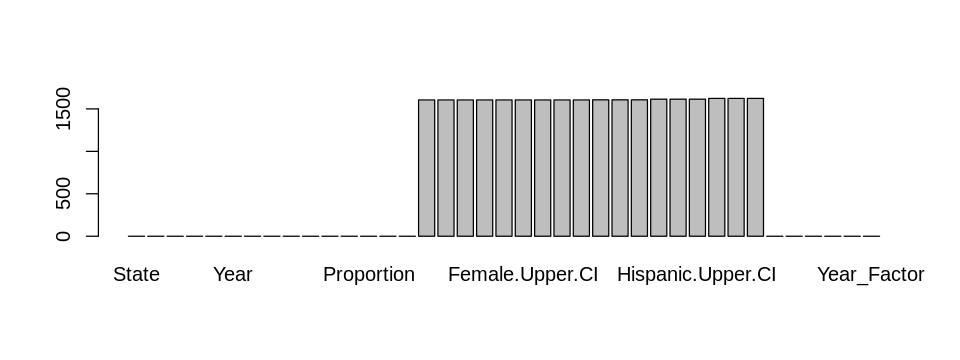

In [27]:
# Check whether each columns got missing value:
lapply(ASD_State_4_MLR, function(col_x)sum(is.na(col_x)))
       
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=3)
barplot(apply(ASD_State_4_MLR, 2, function(col_x)sum(is.na(col_x))))

In [28]:
dim(ASD_State_4_MLR)

[1] 1692   39

In [29]:
#Get all the column variables which contains missing value 
NA_Column_Names <- names(ASD_State_4_MLR[0, colSums(is.na(ASD_State_4_MLR)) > 0])
#
NA_Column_Names

[1] "Male.Prevalence"                     
 [2] "Male.Lower.CI"                       
 [3] "Male.Upper.CI"                       
 [4] "Female.Prevalence"                   
 [5] "Female.Lower.CI"                     
 [6] "Female.Upper.CI"                     
 [7] "Non.hispanic.white.Prevalence"       
 [8] "Non.hispanic.white.Lower.CI"         
 [9] "Non.hispanic.white.Upper.CI"         
[10] "Non.hispanic.black.Prevalence"       
[11] "Non.hispanic.black.Lower.CI"         
[12] "Non.hispanic.black.Upper.CI"         
[13] "Hispanic.Prevalence"                 
[14] "Hispanic.Lower.CI"                   
[15] "Hispanic.Upper.CI"                   
[16] "Asian.or.Pacific.Islander.Prevalence"
[17] "Asian.or.Pacific.Islander.Lower.CI"  
[18] "Asian.or.Pacific.Islander.Upper.CI"

In [30]:
# Remove these columns from dataframe
ASD_State_4_MLR <- ASD_State_4_MLR[ , !(names(ASD_State_4_MLR) %in% NA_Column_Names)]
#
head(ASD_State_4_MLR)

State Denominator Prevalence Lower.CI Upper.CI Year Source
1 AZ    45322       6.5        5.8       7.3     2000 addm  
2 GA    43593       6.5        5.8       7.3     2000 addm  
3 MD    21532       5.5        4.6       6.6     2000 addm  
4 NJ    29714       9.9        8.9      11.1     2000 addm  
5 SC    24535       6.3        5.4       7.4     2000 addm  
6 WV    23065       4.5        3.7       5.5     2000 addm  
  Source_Full1                                           State_Full1   
1 Autism & Developmental Disabilities Monitoring Network Arizona       
2 Autism & Developmental Disabilities Monitoring Network Georgia       
3 Autism & Developmental Disabilities Monitoring Network Maryland      
4 Autism & Developmental Disabilities Monitoring Network New Jersey    
5 Autism & Developmental Disabilities Monitoring Network South Carolina
6 Autism & Developmental Disabilities Monitoring Network West Virginia 
  State_Full2       ... Numerator_NonASD Proportion 
1 AZ-Arizona        ... 45027            0.006508980
2 GA-Georgia        ... 43310            0.006491868
3 MD-Maryland       ... 21414            0.005480215
4 NJ-New Jersey     ... 29420            0.009894326
5 SC-South Carolina ... 24380            0.006317506
6 WV-West Virginia  ... 22961            0.004508996
  Chi_Wilson_Corrected_Lower.CI Chi_Wilson_Corrected_Upper.CI
1 5.798905                       7.303948                    
2 5.769431                       7.302595                    
3 4.557351                       6.583638                    
4 8.814705                      11.102544                    
5 5.381662                       7.411085                    
6 3.703408                       5.483723                    
  State_Region       Source_UC
1 D8 Mountain        ADDM     
2 D5 South Atlantic  ADDM     
3 D5 South Atlantic  ADDM     
4 D2 Middle Atlantic ADDM     
5 D5 South Atlantic  ADDM     
6 D5 South Atlantic  ADDM     
  Source_Full3                                                Prevalence_Risk2
1 ADDM Autism & Developmental Disabilities Monitoring Network High            
2 ADDM Autism & Developmental Disabilities Monitoring Network High            
3 ADDM Autism & Developmental Disabilities Monitoring Network High            
4 ADDM Autism & Developmental Disabilities Monitoring Network High            
5 ADDM Autism & Developmental Disabilities Monitoring Network High            
6 ADDM Autism & Developmental Disabilities Monitoring Network Low             
  Prevalence_Risk4 Year_Factor
1 Medium           2000       
2 Medium           2000       
3 Medium           2000       
4 Medium           2000       
5 Medium           2000       
6 Low              2000

**No missing values, as they have been handled earlier. <span style="color:blue">Hurrah!</span>**

**But some varialbe contains <span style="color:blue">"leaky"</span> information, which can be used to directly calculate the dependent variable: Prevalence. This won't happen in real world scenario, thus they need to be removed.**

In [31]:
cbind(names(ASD_State_4_MLR), c(1:length(names(ASD_State_4_MLR))))

[,1]                          [,2]
 [1,] State                         1   
 [2,] Denominator                   2   
 [3,] Prevalence                    3   
 [4,] Lower.CI                      4   
 [5,] Upper.CI                      5   
 [6,] Year                          6   
 [7,] Source                        7   
 [8,] Source_Full1                  8   
 [9,] State_Full1                   9   
[10,] State_Full2                   10  
[11,] Numerator_ASD                 11  
[12,] Numerator_NonASD              12  
[13,] Proportion                    13  
[14,] Chi_Wilson_Corrected_Lower.CI 14  
[15,] Chi_Wilson_Corrected_Upper.CI 15  
[16,] State_Region                  16  
[17,] Source_UC                     17  
[18,] Source_Full3                  18  
[19,] Prevalence_Risk2              19  
[20,] Prevalence_Risk4              20  
[21,] Year_Factor                   21

In [32]:
Leaky_Column_Names = c('Lower.CI', 'Upper.CI', 'Numerator_ASD', 'Numerator_NonASD', 'Proportion', 
                       'Chi_Wilson_Corrected_Lower.CI', 'Chi_Wilson_Corrected_Upper.CI', 
                       'Prevalence_Risk2', 'Prevalence_Risk4')

In [33]:
# Remove these columns from dataframe
ASD_State_4_MLR <- ASD_State_4_MLR[ , !(names(ASD_State_4_MLR) %in% Leaky_Column_Names)]
#
head(ASD_State_4_MLR)

State Denominator Prevalence Year Source
1 AZ    45322       6.5        2000 addm  
2 GA    43593       6.5        2000 addm  
3 MD    21532       5.5        2000 addm  
4 NJ    29714       9.9        2000 addm  
5 SC    24535       6.3        2000 addm  
6 WV    23065       4.5        2000 addm  
  Source_Full1                                           State_Full1   
1 Autism & Developmental Disabilities Monitoring Network Arizona       
2 Autism & Developmental Disabilities Monitoring Network Georgia       
3 Autism & Developmental Disabilities Monitoring Network Maryland      
4 Autism & Developmental Disabilities Monitoring Network New Jersey    
5 Autism & Developmental Disabilities Monitoring Network South Carolina
6 Autism & Developmental Disabilities Monitoring Network West Virginia 
  State_Full2       State_Region       Source_UC
1 AZ-Arizona        D8 Mountain        ADDM     
2 GA-Georgia        D5 South Atlantic  ADDM     
3 MD-Maryland       D5 South Atlantic  ADDM     
4 NJ-New Jersey     D2 Middle Atlantic ADDM     
5 SC-South Carolina D5 South Atlantic  ADDM     
6 WV-West Virginia  D5 South Atlantic  ADDM     
  Source_Full3                                                Year_Factor
1 ADDM Autism & Developmental Disabilities Monitoring Network 2000       
2 ADDM Autism & Developmental Disabilities Monitoring Network 2000       
3 ADDM Autism & Developmental Disabilities Monitoring Network 2000       
4 ADDM Autism & Developmental Disabilities Monitoring Network 2000       
5 ADDM Autism & Developmental Disabilities Monitoring Network 2000       
6 ADDM Autism & Developmental Disabilities Monitoring Network 2000

**Remove redundant/duplicate variables (aliased coefficients), retaining one for each type of information is enough:**

https://en.wikipedia.org/wiki/Multicollinearity

https://stats.stackexchange.com/questions/112442/what-are-aliased-coefficients

In [34]:
Redundant_Column_Names = c('State', 'Source_Full1', 'State_Full1', 'State_Region', 'Source_UC', 'Source_Full3', 'Year_Factor')

In [35]:
# Remove these columns from dataframe
ASD_State_4_MLR <- ASD_State_4_MLR[ , !(names(ASD_State_4_MLR) %in% Redundant_Column_Names)]
#
head(ASD_State_4_MLR)

Denominator Prevalence Year Source State_Full2      
1 45322       6.5        2000 addm   AZ-Arizona       
2 43593       6.5        2000 addm   GA-Georgia       
3 21532       5.5        2000 addm   MD-Maryland      
4 29714       9.9        2000 addm   NJ-New Jersey    
5 24535       6.3        2000 addm   SC-South Carolina
6 23065       4.5        2000 addm   WV-West Virginia

---

**MLR Workshop Task: <span style="color:blue">3. c.	Visualize the data to gain insights</span>**

In [36]:
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=4)

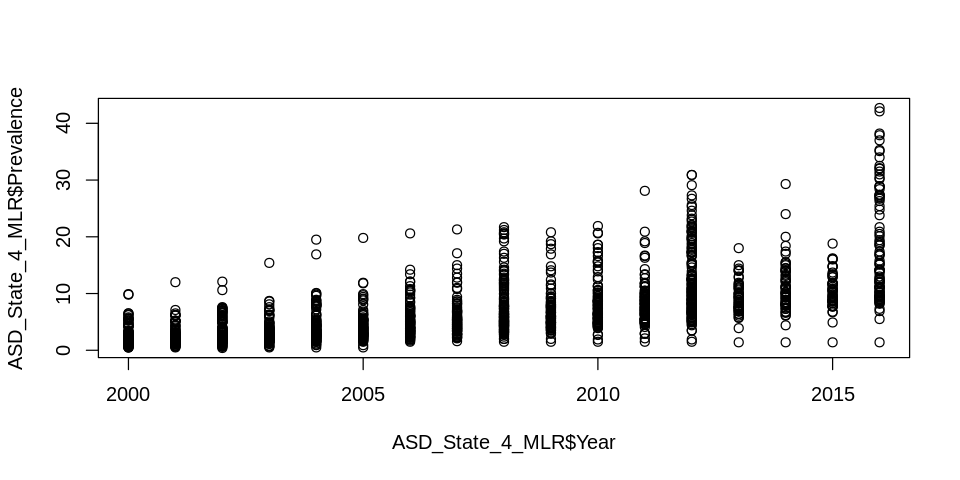

In [37]:
plot(ASD_State_4_MLR$Year, ASD_State_4_MLR$Prevalence)

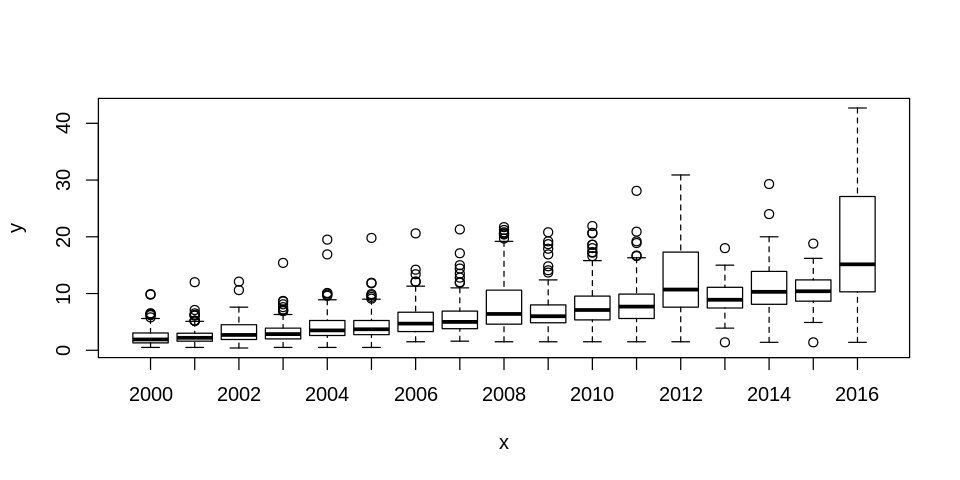

In [38]:
plot(as.factor(ASD_State_4_MLR$Year), ASD_State_4_MLR$Prevalence)

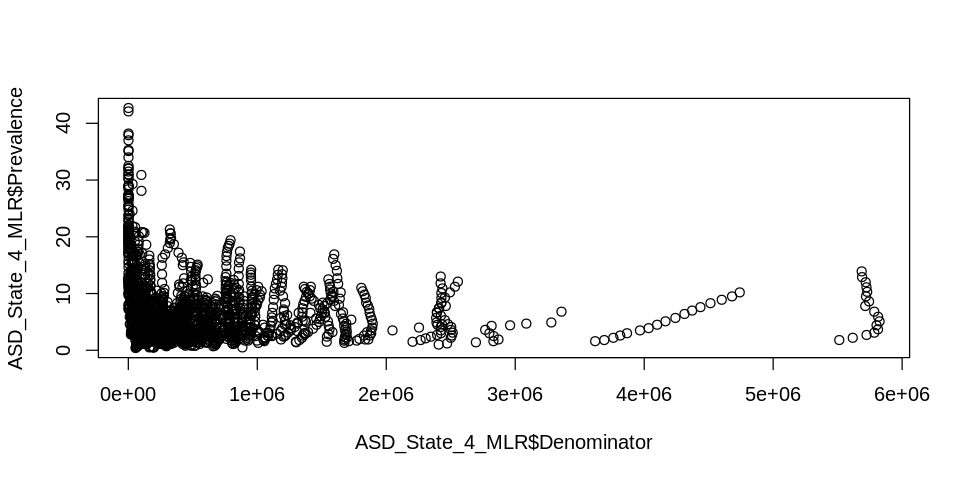

In [39]:
plot(ASD_State_4_MLR$Denominator, ASD_State_4_MLR$Prevalence)

Loading required package: OneR


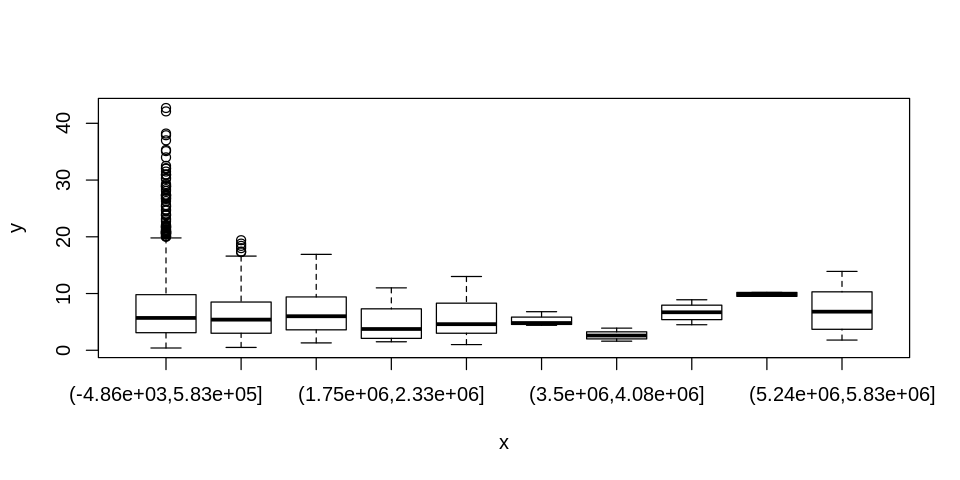

In [40]:
# To use bin() function
# https://www.rdocumentation.org/packages/OneR/versions/2.2/topics/bin
if(!require(OneR)){install.packages("OneR")}
library('OneR')

# Bin 'Denominator'
plot(bin(ASD_State_4_MLR$Denominator, nbins = 10), ASD_State_4_MLR$Prevalence)

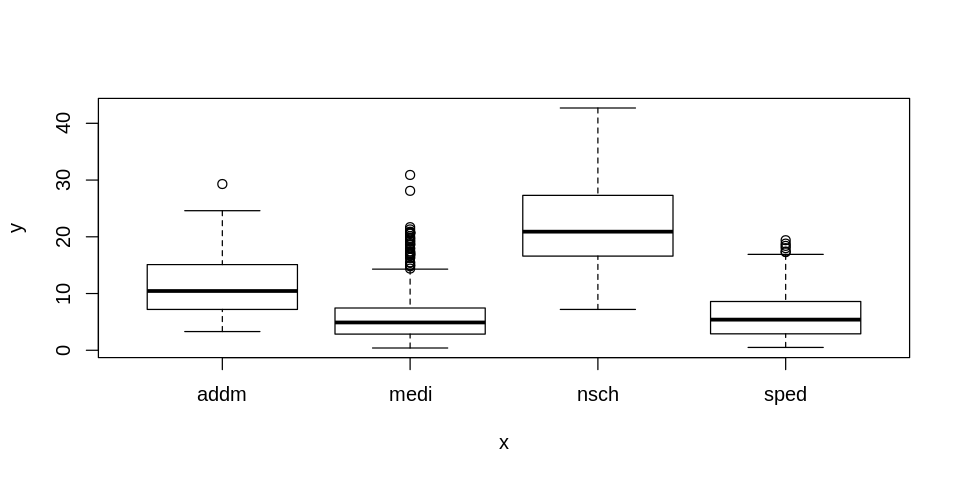

In [41]:
plot(ASD_State_4_MLR$Source, ASD_State_4_MLR$Prevalence)

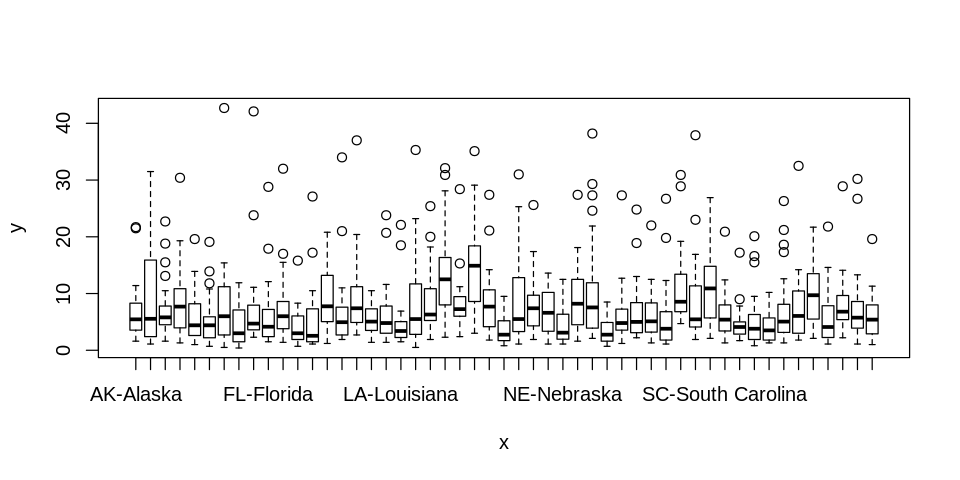

In [42]:
plot(ASD_State_4_MLR$State_Full2, ASD_State_4_MLR$Prevalence)

---

**MLR Workshop Task: <span style="color:blue">4. d.	Compute correlation between variables and apply multiple regression.</span>**

Recode categorical variable to dummy (numeric) variable using one-hot encoding:

In [43]:
# To use select_if() function
if(!require(dplyr)){install.packages("dplyr")}
library("dplyr")

summary(select_if(ASD_State_4_MLR, is.numeric))

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



  Denominator        Prevalence          Year     
 Min.   :    965   Min.   : 0.400   Min.   :2000  
 1st Qu.: 107151   1st Qu.: 3.100   1st Qu.:2003  
 Median : 353328   Median : 5.600   Median :2007  
 Mean   : 604689   Mean   : 7.191   Mean   :2007  
 3rd Qu.: 767928   3rd Qu.: 9.200   3rd Qu.:2011  
 Max.   :5824922   Max.   :42.700   Max.   :2016  

In [44]:
correlation = cor(select_if(ASD_State_4_MLR, is.numeric))
correlation

Denominator Prevalence Year      
Denominator  1.00000000 -0.1374662 0.02851671
Prevalence  -0.13746621  1.0000000 0.64002950
Year         0.02851671  0.6400295 1.00000000

In [45]:
# Variable's correlation against target dependent variable:
correlation[, 2]

Denominator  Prevalence        Year 
 -0.1374662   1.0000000   0.6400295

Loading required package: corrplot
corrplot 0.84 loaded


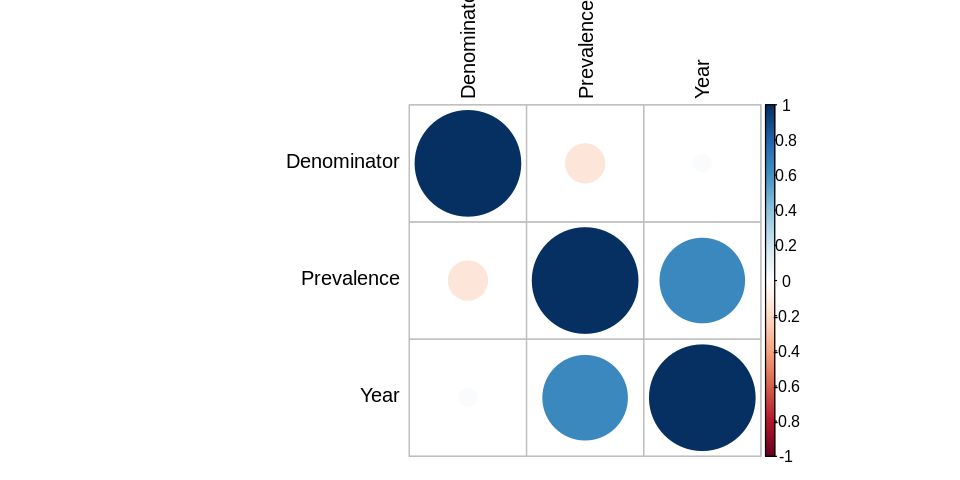

In [46]:
if(!require(corrplot)){install.packages("corrplot")}
library("corrplot")
corrplot(correlation, tl.col="black", tl.pos = "lt")

In [47]:
str(ASD_State_4_MLR)

'data.frame':	1692 obs. of  5 variables:
 $ Denominator: int  45322 43593 21532 29714 24535 23065 35472 45113 36472 11020 ...
 $ Prevalence : num  6.5 6.5 5.5 9.9 6.3 4.5 3.3 6.2 6.9 5.9 ...
 $ Year       : int  2000 2000 2000 2000 2000 2000 2002 2002 2002 2002 ...
 $ Source     : Factor w/ 4 levels "addm","medi",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ State_Full2: Factor w/ 51 levels "AK-Alaska","AL-Alabama",..: 4 11 21 32 41 50 2 4 3 6 ...


In [48]:
# To build (National level) ASD Prevalence predictive model for all state's:
# In situations that we won't know the US. State name, we can also fit a model without State name/code:
fit_model = lm(Prevalence ~ . - State_Full2, data = ASD_State_4_MLR) # Exclude a variable using: "- variable"
#
summary(fit_model)


Call:
lm(formula = Prevalence ~ . - State_Full2, data = ASD_State_4_MLR)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4476  -1.9332  -0.2786   1.2479  21.0130 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.310e+03  3.819e+01 -34.306   <2e-16 ***
Denominator -1.139e-07  1.057e-07  -1.078    0.281    
Year         6.583e-01  1.902e-02  34.606   <2e-16 ***
Sourcemedi  -4.550e+00  3.964e-01 -11.478   <2e-16 ***
Sourcensch   6.699e+00  5.171e-01  12.956   <2e-16 ***
Sourcesped  -5.611e+00  3.984e-01 -14.085   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.43 on 1686 degrees of freedom
Multiple R-squared:  0.6585,	Adjusted R-squared:  0.6575 
F-statistic: 650.2 on 5 and 1686 DF,  p-value: < 2.2e-16


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <p>
        Adjusted $R^2$ = 0.6575
    </p>
</div>


In [49]:
# To build (US. State level) ASD Prevalence predictive model for specific state's prevalence:
# In situations that we shall know the US. State name. (A state name is required during prediciton.)
fit_model = lm(Prevalence ~ . , data = ASD_State_4_MLR) # "~." means all other variables, including factors
#
summary(fit_model)


Call:
lm(formula = Prevalence ~ ., data = ASD_State_4_MLR)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.3326  -1.3626  -0.0689   1.2558  19.0273 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -1.305e+03  3.144e+01 -41.498  < 2e-16 ***
Denominator                         1.152e-06  2.252e-07   5.115 3.50e-07 ***
Year                                6.558e-01  1.566e-02  41.889  < 2e-16 ***
Sourcemedi                         -4.997e+00  3.557e-01 -14.048  < 2e-16 ***
Sourcensch                          6.100e+00  4.404e-01  13.853  < 2e-16 ***
Sourcesped                         -6.699e+00  3.915e-01 -17.110  < 2e-16 ***
State_Full2AL-Alabama               1.377e+00  6.917e-01   1.990 0.046725 *  
State_Full2AR-Arkansas             -8.466e-01  6.838e-01  -1.238 0.215831    
State_Full2AZ-Arizona               1.592e-01  6.841e-01   0.233 0.816057    
State_Full2CA-California           -5.092

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <p>
        Adjusted $R^2$ = 0.7697
    </p>
</div>


---

**MLR Workshop Task: <span style="color:blue">5. e.	Check multicollinearity, then how to remove multicollinearity.</span>**

< Detection of multicollinearity >

Some authors have suggested a formal detection-tolerance or the variance inflation factor (VIF) for multicollinearity. <span style="color:blue">A VIF of 5 or 10 and above</span> indicates a multicollinearity problem.

In [50]:
# To use select_if() function
if(!require(car)){install.packages("car")}
library("car")

Loading required package: car
Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode



In [51]:
vif(fit_model)

GVIF     Df GVIF^(1/(2*Df))
Denominator 7.737921  1 2.781712       
Year        1.146987  1 1.070975       
Source      2.502245  3 1.165167       
State_Full2 7.768262 50 1.020712

**<span style="color:blue">[ Tips ]</span> We notice VIF of Denominator and State_Full2 are high.** Let's exclude them one at a time.

**Retain: State; Remove: Denominator then re-build model:**

In [52]:
# To build (National level) ASD Prevalence predictive model for all state's:
# In situations that we won't know the US. State name, we can also fit a model without State name/code:
fit_model_with_State = lm(Prevalence ~ . - Denominator, data = ASD_State_4_MLR) # Exclude a variable using: "- variable"
#
summary(fit_model_with_State)


Call:
lm(formula = Prevalence ~ . - Denominator, data = ASD_State_4_MLR)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7769  -1.3853  -0.0184   1.2957  19.2545 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -1.319e+03  3.157e+01 -41.774  < 2e-16 ***
Year                                6.624e-01  1.572e-02  42.130  < 2e-16 ***
Sourcemedi                         -4.503e+00  3.450e-01 -13.053  < 2e-16 ***
Sourcensch                          6.149e+00  4.436e-01  13.861  < 2e-16 ***
Sourcesped                         -5.685e+00  3.403e-01 -16.708  < 2e-16 ***
State_Full2AL-Alabama               1.875e+00  6.901e-01   2.717 0.006662 ** 
State_Full2AR-Arkansas             -4.970e-01  6.855e-01  -0.725 0.468547    
State_Full2AZ-Arizona               8.608e-01  6.754e-01   1.275 0.202621    
State_Full2CA-California           -2.119e-01  7.141e-01  -0.297 0.766731    
State_Full2CO-Colorado     

In [53]:
vif(fit_model_with_State)

GVIF     Df GVIF^(1/(2*Df))
Year        1.139247  1 1.067355       
Source      1.306350  3 1.045546       
State_Full2 1.149997 50 1.001399

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <p>
        Adjusted $R^2$ = 0.7662
    </p>
</div>


---

**Retain: Denominator; Remove: State; then re-build model:**

In [54]:
# To build (National level) ASD Prevalence predictive model for all state's:
# In situations that we won't know the US. State name, we can also fit a model without State name/code:
fit_model_with_Denominator = lm(Prevalence ~ . - State_Full2, data = ASD_State_4_MLR) # Exclude a variable using: "- variable"
#
summary(fit_model_with_Denominator)


Call:
lm(formula = Prevalence ~ . - State_Full2, data = ASD_State_4_MLR)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4476  -1.9332  -0.2786   1.2479  21.0130 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.310e+03  3.819e+01 -34.306   <2e-16 ***
Denominator -1.139e-07  1.057e-07  -1.078    0.281    
Year         6.583e-01  1.902e-02  34.606   <2e-16 ***
Sourcemedi  -4.550e+00  3.964e-01 -11.478   <2e-16 ***
Sourcensch   6.699e+00  5.171e-01  12.956   <2e-16 ***
Sourcesped  -5.611e+00  3.984e-01 -14.085   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.43 on 1686 degrees of freedom
Multiple R-squared:  0.6585,	Adjusted R-squared:  0.6575 
F-statistic: 650.2 on 5 and 1686 DF,  p-value: < 2.2e-16


In [55]:
vif(fit_model_with_Denominator)

GVIF     Df GVIF^(1/(2*Df))
Denominator 1.145505 1  1.070283       
Year        1.138674 1  1.067086       
Source      1.301973 3  1.044962

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <p>
        Adjusted $R^2$ = 0.6575
    </p>
</div>


---

**MLR Workshop Task: <span style="color:blue">6. f.	How is your ﬁnal model looks like?</span>**

* During prediction, if US. State name will be known, then the **fit_model_with_State** can be better because it has higher $R^2$ value.


* During prediction, if US. State name will NOT be known,  then the **fit_model_with_Denominator** can be adopted because it doesn't require state name as input for prediciton.


**MLR Prediciton 1**

Let's use **fit_model_with_State** to predict CA-California ASD Prevalence of Year 2016 if ADDM would have conducted a survey

In [56]:
newdata = ASD_State_4_MLR[1,] # Copy datastructure
newdata$Prevalence = NA
newdata$Denominator = 50000
newdata$Year = 2016
newdata$Source = "addm"
#newdata$State_Full2 = "CA-California"
newdata$State_Full2 = "AZ-Arizona"

newdata

Denominator Prevalence Year Source State_Full2
1 50000       NA         2016 addm   AZ-Arizona

In [57]:
predict(fit_model_with_State, newdata, interval = "predict")
#
cat("Predicted ASD Prevalence is", round(predict(fit_model_with_State, newdata), 1), "per 1,000 Children")

fit      lwr      upr     
1 17.54292 11.88535 23.20049

Predicted ASD Prevalence is 17.5 per 1,000 Children

**MLR Prediciton 2**

Let's use **fit_model_with_Denominator** to predict National level ASD Prevalence of Year 2016 if ADDM would have conducted a survey

In [58]:
predict(fit_model_with_Denominator, newdata, interval = "predict")
#
cat("Predicted ASD Prevalence is", round(predict(fit_model_with_Denominator, newdata), 1), "per 1,000 Children")

fit      lwr      upr     
1 17.07629 10.30306 23.84952

Predicted ASD Prevalence is 17.1 per 1,000 Children

**MLR Prediciton 2**

Let's use **fit_model** to predict FL-Florida State level ASD Prevalence of Year 2025 if SPED will conduct a record review/survey of 2,600,000 children.

In [59]:
newdata = ASD_State_4_MLR[1,] # Copy datastructure
newdata$Prevalence = NA
newdata$Denominator = 2600000
newdata$Year = 2025
newdata$Source = "sped"
newdata$State_Full2 = "FL-Florida"

newdata

Denominator Prevalence Year Source State_Full2
1 2600000     NA         2025 sped   FL-Florida

In [60]:
predict(fit_model, newdata, interval = "predict")
#
cat("Predicted ASD Prevalence is", round(predict(fit_model, newdata), 1), "per 1,000 Children")

fit      lwr      upr    
1 16.63773 11.00985 22.2656

Predicted ASD Prevalence is 16.6 per 1,000 Children

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="" width="750" align="center">
    </a>
</div>



## <span style="color:blue">Linear Model: Polynomial (Linear) Regression (PLR)</span>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Linear Model: Polynomial (Linear) Regression (PLR) - Workshop Task
    </h3>
</div>


**Workshop Task:**

1. a.	Get the data.

2. b.	Discover and visualize the data to gain insights (Is there missing Value in the dataframe, then how to deal with the missing value)

3. c.	Visualize Data and trends

4. d.	Compute correlation between variables and apply multiple regression.

5. e.	Multiple polynomial regression.


**PLR Workshop Task: <span style="color:blue">1. a. Get the data.</span>**

**Use Case Data: <span style="color:blue">"../dataset/ADV_ASD_State_R.csv"</span>**

**Read in CSV data, storing as R <span style="color:blue">dataframe</span>**

In [61]:
# Read back in above saved file:
ASD_State <- read.csv("../dataset/ADV_ASD_State_R.csv")
ASD_State$Year_Factor <- factor(ASD_State$Year_Factor, ordered = TRUE) # Convert Year_Factor to ordered.factor
ASD_State$Prevalence_Risk2 = factor(ASD_State$Prevalence_Risk2, ordered=TRUE, levels=c("Low", "High"))
ASD_State$Prevalence_Risk4 = factor(ASD_State$Prevalence_Risk4, ordered=TRUE, levels=c("Low", "Medium", "High", "Very High"))


In [62]:
head(ASD_State)

State Denominator Prevalence Lower.CI Upper.CI Year Source
1 AZ    45322       6.5        5.8       7.3     2000 addm  
2 GA    43593       6.5        5.8       7.3     2000 addm  
3 MD    21532       5.5        4.6       6.6     2000 addm  
4 NJ    29714       9.9        8.9      11.1     2000 addm  
5 SC    24535       6.3        5.4       7.4     2000 addm  
6 WV    23065       4.5        3.7       5.5     2000 addm  
  Source_Full1                                           State_Full1   
1 Autism & Developmental Disabilities Monitoring Network Arizona       
2 Autism & Developmental Disabilities Monitoring Network Georgia       
3 Autism & Developmental Disabilities Monitoring Network Maryland      
4 Autism & Developmental Disabilities Monitoring Network New Jersey    
5 Autism & Developmental Disabilities Monitoring Network South Carolina
6 Autism & Developmental Disabilities Monitoring Network West Virginia 
  State_Full2       ... Hispanic.Upper.CI Asian.or.Pacific.Islander.Prevalence
1 AZ-Arizona        ... NA                NA                                  
2 GA-Georgia        ... NA                NA                                  
3 MD-Maryland       ... NA                NA                                  
4 NJ-New Jersey     ... NA                NA                                  
5 SC-South Carolina ... NA                NA                                  
6 WV-West Virginia  ... NA                NA                                  
  Asian.or.Pacific.Islander.Lower.CI Asian.or.Pacific.Islander.Upper.CI
1 NA                                 NA                                
2 NA                                 NA                                
3 NA                                 NA                                
4 NA                                 NA                                
5 NA                                 NA                                
6 NA                                 NA                                
  State_Region       Source_UC
1 D8 Mountain        ADDM     
2 D5 South Atlantic  ADDM     
3 D5 South Atlantic  ADDM     
4 D2 Middle Atlantic ADDM     
5 D5 South Atlantic  ADDM     
6 D5 South Atlantic  ADDM     
  Source_Full3                                                Prevalence_Risk2
1 ADDM Autism & Developmental Disabilities Monitoring Network High            
2 ADDM Autism & Developmental Disabilities Monitoring Network High            
3 ADDM Autism & Developmental Disabilities Monitoring Network High            
4 ADDM Autism & Developmental Disabilities Monitoring Network High            
5 ADDM Autism & Developmental Disabilities Monitoring Network High            
6 ADDM Autism & Developmental Disabilities Monitoring Network Low             
  Prevalence_Risk4 Year_Factor
1 Medium           2000       
2 Medium           2000       
3 Medium           2000       
4 Medium           2000       
5 Medium           2000       
6 Low              2000

In [63]:
names(ASD_State)

[1] "State"                               
 [2] "Denominator"                         
 [3] "Prevalence"                          
 [4] "Lower.CI"                            
 [5] "Upper.CI"                            
 [6] "Year"                                
 [7] "Source"                              
 [8] "Source_Full1"                        
 [9] "State_Full1"                         
[10] "State_Full2"                         
[11] "Numerator_ASD"                       
[12] "Numerator_NonASD"                    
[13] "Proportion"                          
[14] "Chi_Wilson_Corrected_Lower.CI"       
[15] "Chi_Wilson_Corrected_Upper.CI"       
[16] "Male.Prevalence"                     
[17] "Male.Lower.CI"                       
[18] "Male.Upper.CI"                       
[19] "Female.Prevalence"                   
[20] "Female.Lower.CI"                     
[21] "Female.Upper.CI"                     
[22] "Non.hispanic.white.Prevalence"       
[23] "Non.hispanic.white.Lower.CI"         
[24] "Non.hispanic.white.Upper.CI"         
[25] "Non.hispanic.black.Prevalence"       
[26] "Non.hispanic.black.Lower.CI"         
[27] "Non.hispanic.black.Upper.CI"         
[28] "Hispanic.Prevalence"                 
[29] "Hispanic.Lower.CI"                   
[30] "Hispanic.Upper.CI"                   
[31] "Asian.or.Pacific.Islander.Prevalence"
[32] "Asian.or.Pacific.Islander.Lower.CI"  
[33] "Asian.or.Pacific.Islander.Upper.CI"  
[34] "State_Region"                        
[35] "Source_UC"                           
[36] "Source_Full3"                        
[37] "Prevalence_Risk2"                    
[38] "Prevalence_Risk4"                    
[39] "Year_Factor"

In [64]:
# Filter [ Source: SPED ], including only two clomuns for SLR:
# Dependent variable: Prevalence
# independent variable: Year
# ASD_State_4_PLR = subset(ASD_State, Source_UC == 'SPED' & State_Full2 == 'MN-Minnesota', select = c(Prevalence, Year))
# ASD_State_4_PLR = subset(ASD_State, Source_UC == 'SPED' & State_Full2 == 'MS-Mississippi', select = c(Prevalence, Year))
ASD_State_4_PLR = subset(ASD_State, Source_UC == 'SPED' & State_Full2 == 'FL-Florida', select = c(Prevalence, Year))
#
dim(ASD_State_4_PLR)
head(ASD_State_4_PLR)

[1] 17  2

Prevalence Year
849  1.5        2000
900  1.8        2001
951  2.1        2002
1002 2.4        2003
1052 2.7        2004
1100 3.0        2005

---

**PLR Workshop Task: <span style="color:blue">2. b.	Discover and visualize the data to gain insights (Is there missing Value in the dataframe, then how to deal with the missing value).</span>**

In [65]:
summary(ASD_State_4_PLR)

   Prevalence          Year     
 Min.   : 1.500   Min.   :2000  
 1st Qu.: 2.700   1st Qu.:2004  
 Median : 4.900   Median :2008  
 Mean   : 5.694   Mean   :2008  
 3rd Qu.: 8.300   3rd Qu.:2012  
 Max.   :12.100   Max.   :2016  

$Prevalence
[1] 0

$Year
[1] 0

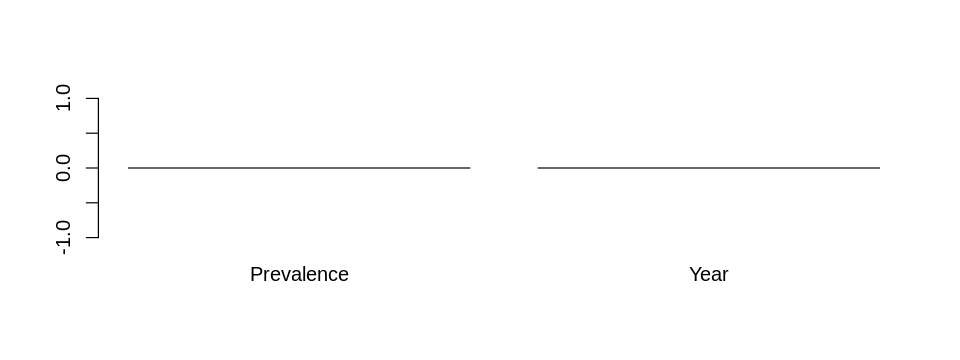

In [66]:
# Check whether each columns got missing value:
lapply(ASD_State_4_PLR, function(col_x)sum(is.na(col_x)))
       
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=3)
barplot(apply(ASD_State_4_PLR, 2, function(col_x)sum(is.na(col_x))))

**No missing values**

---

**PLR Workshop Task: <span style="color:blue">3. c.	Visualize the data to gain insights</span>**

In [67]:
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=4)

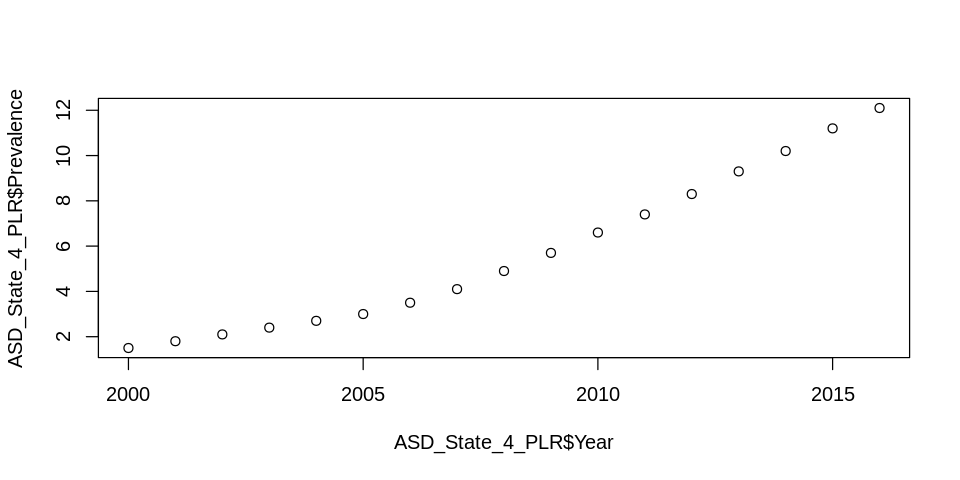

In [68]:
plot(ASD_State_4_PLR$Year, ASD_State_4_PLR$Prevalence)

---

**PLR Workshop Task: <span style="color:blue">4. d.	Compute correlation between variables and apply multiple regression.</span>**

Recode categorical variable to dummy (numeric) variable using one-hot encoding:

In [69]:
# To use select_if() function
if(!require(dplyr)){install.packages("dplyr")}
library("dplyr")

summary(select_if(ASD_State_4_PLR, is.numeric))

   Prevalence          Year     
 Min.   : 1.500   Min.   :2000  
 1st Qu.: 2.700   1st Qu.:2004  
 Median : 4.900   Median :2008  
 Mean   : 5.694   Mean   :2008  
 3rd Qu.: 8.300   3rd Qu.:2012  
 Max.   :12.100   Max.   :2016  

In [70]:
correlation = cor(select_if(ASD_State_4_PLR, is.numeric))
correlation

Prevalence Year    
Prevalence 1.000000   0.980119
Year       0.980119   1.000000

In [71]:
# Variable's correlation against target dependent variable:
correlation[, 1]

Prevalence       Year 
  1.000000   0.980119

In [72]:
str(ASD_State_4_PLR)

'data.frame':	17 obs. of  2 variables:
 $ Prevalence: num  1.5 1.8 2.1 2.4 2.7 3 3.5 4.1 4.9 5.7 ...
 $ Year      : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...


In [73]:
# SLR
fit_model_SLR = lm(Prevalence ~ Year , data = ASD_State_4_PLR)
#
summary(fit_model_SLR)


Call:
lm(formula = Prevalence ~ Year, data = ASD_State_4_PLR)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9150 -0.6566 -0.1108  0.4809  1.2392 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1358.0726    71.2824  -19.05 6.37e-12 ***
Year            0.6792     0.0355   19.13 6.00e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.717 on 15 degrees of freedom
Multiple R-squared:  0.9606,	Adjusted R-squared:  0.958 
F-statistic:   366 on 1 and 15 DF,  p-value: 5.995e-12


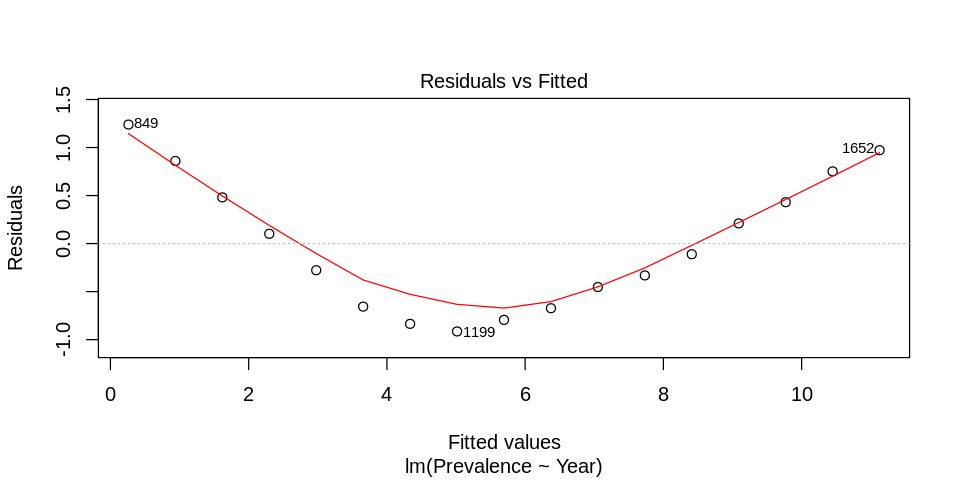

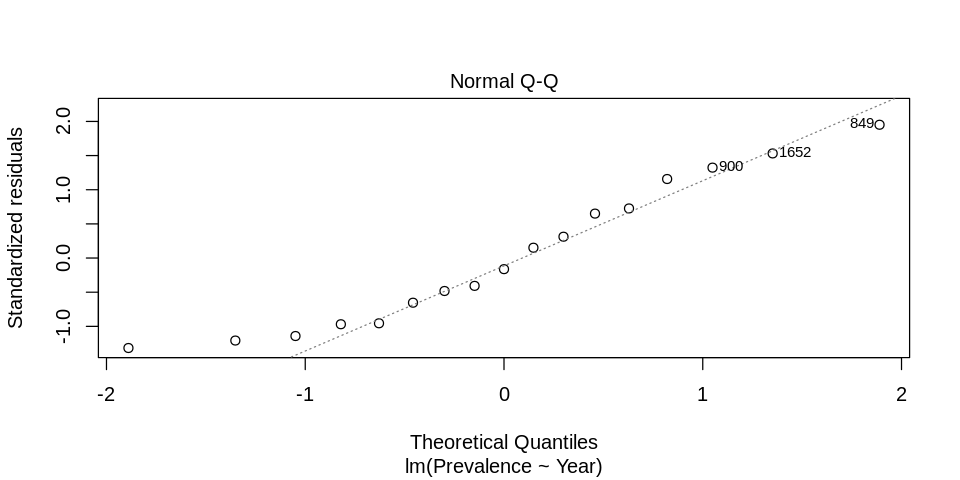

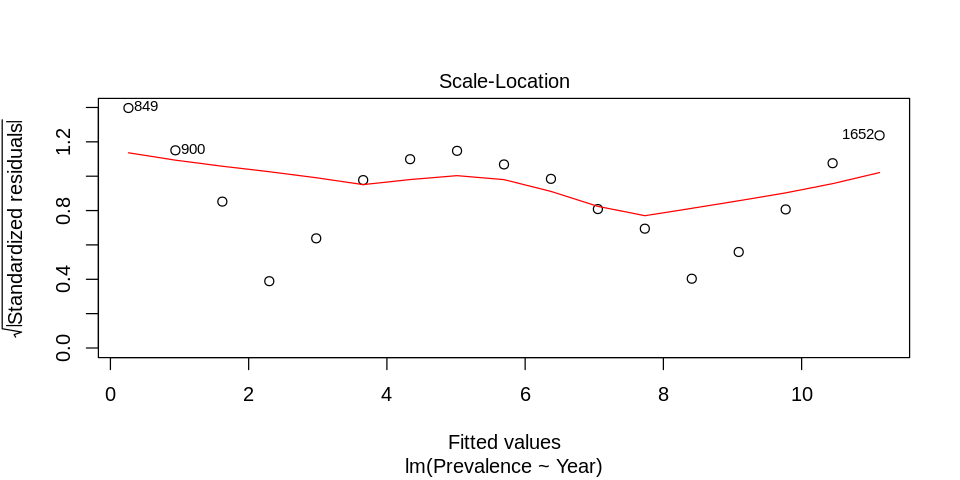

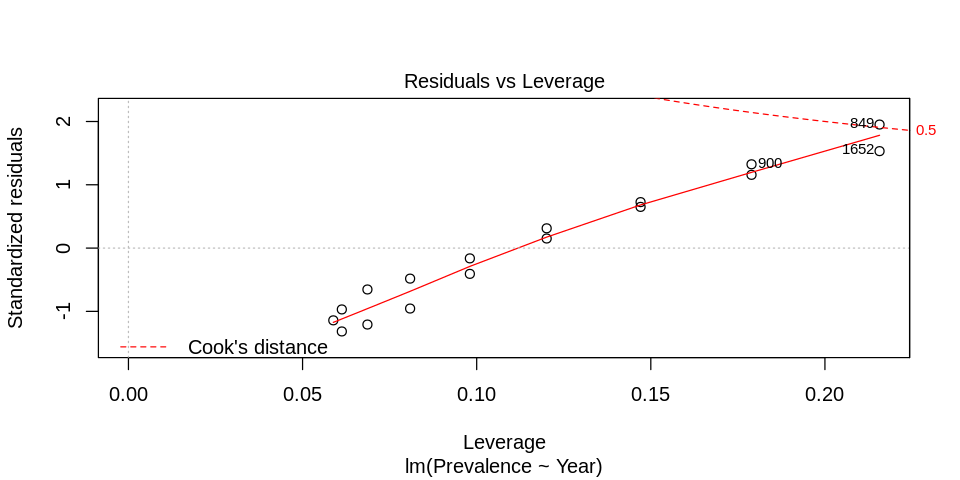

In [74]:
plot(fit_model_SLR)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <p>
        Adjusted $R^2$ = 0.958
    </p>
</div>


In [75]:
# PLR (quadratic)
fit_model_PLR = lm(Prevalence ~ Year + I(Year^2), data = ASD_State_4_PLR)
#
summary(fit_model_PLR)


Call:
lm(formula = Prevalence ~ Year + I(Year^2), data = ASD_State_4_PLR)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26223 -0.05325  0.03671  0.11045  0.17918 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.231e+05  6.980e+03   17.64 5.87e-11 ***
Year        -1.233e+02  6.953e+00  -17.73 5.45e-11 ***
I(Year^2)    3.087e-02  1.731e-03   17.83 5.07e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1524 on 14 degrees of freedom
Multiple R-squared:  0.9983,	Adjusted R-squared:  0.9981 
F-statistic:  4209 on 2 and 14 DF,  p-value: < 2.2e-16


**Abount I() function:** https://stackoverflow.com/questions/8055508/in-r-formulas-why-do-i-have-to-use-the-i-function-on-power-terms-like-y-i


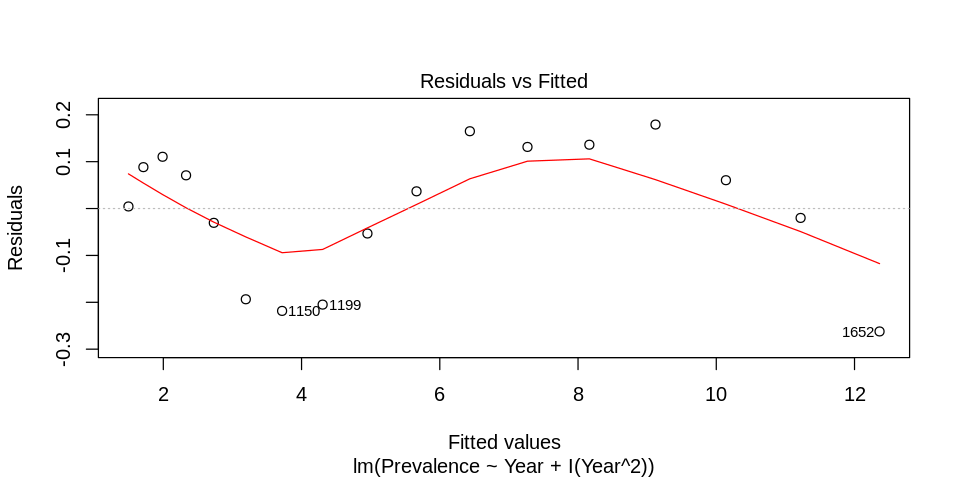

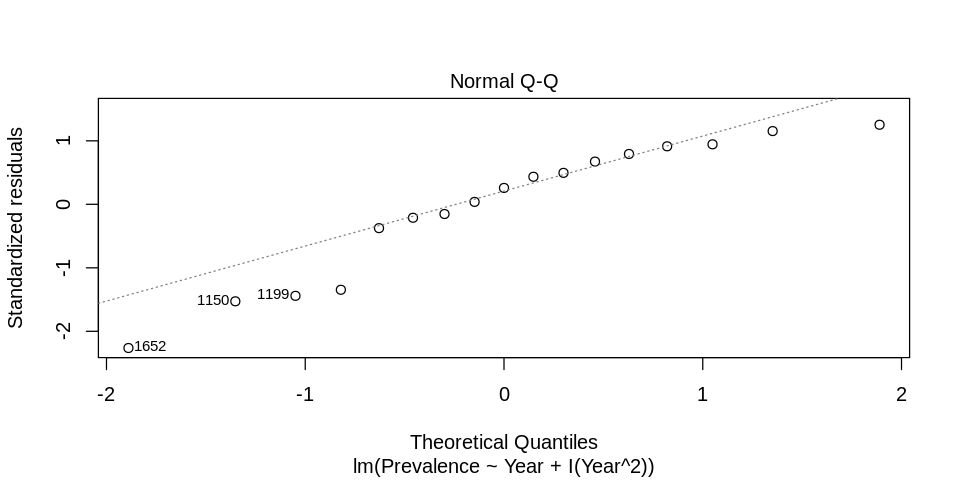

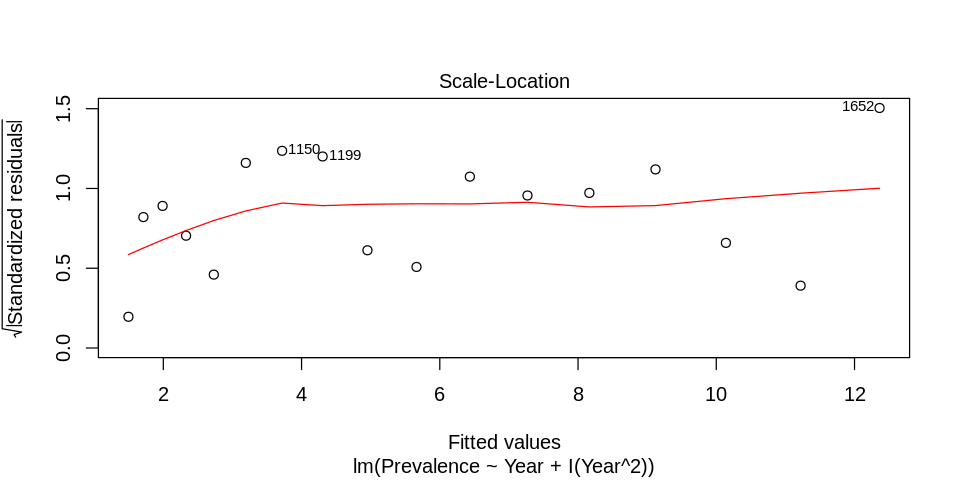

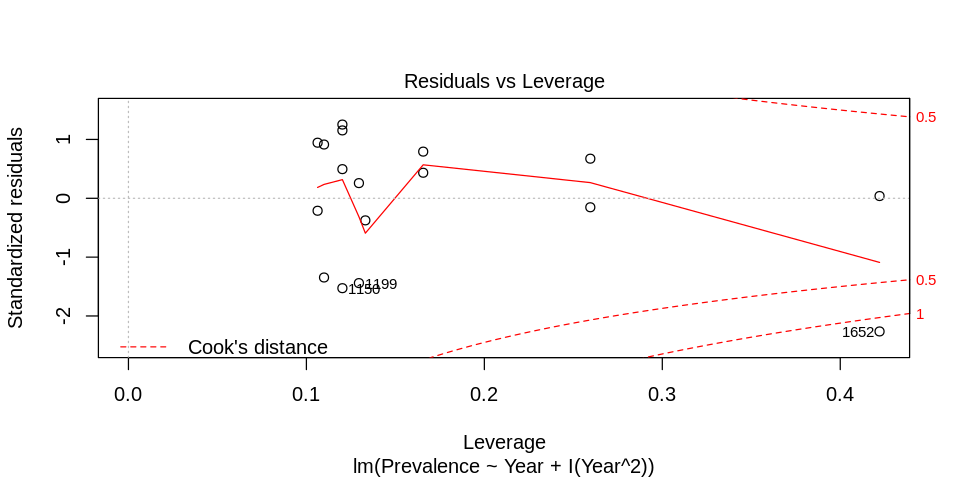

In [76]:
plot(fit_model_PLR)

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <p>
        Adjusted $R^2$ = 0.9981
    </p>
</div>


**Visualise the difference between SLR & PLR:**

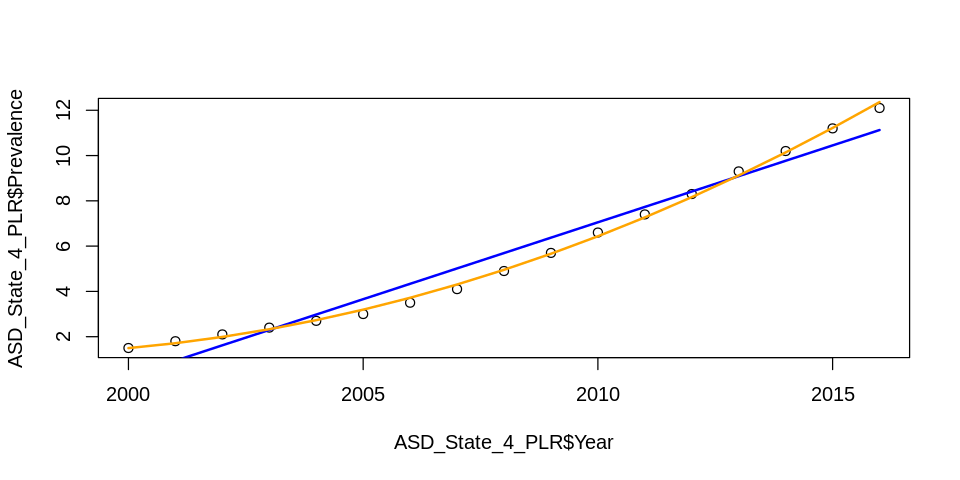

In [77]:
plot(ASD_State_4_PLR$Year, ASD_State_4_PLR$Prevalence)
# add SLR line
lines(ASD_State_4_PLR$Year, predict(fit_model_SLR, ASD_State_4_PLR), col="blue", lwd=2) # or # abline(fit_model_SLR, col="blue", lwd=2)
# add PLR line
lines(ASD_State_4_PLR$Year, predict(fit_model_PLR, ASD_State_4_PLR), col="orange", lwd=2) 

---

**PLR Prediciton**


In [78]:
newdata = ASD_State_4_PLR[1,] # Copy datastructure
newdata$Prevalence = NA
newdata$Year = 2025

newdata

Prevalence Year
849 NA         2025

In [79]:
predict(fit_model_PLR, newdata, interval = "predict")
#
cat("Predicted ASD Prevalence of Year [", newdata$Year, "] is", round(predict(fit_model_PLR, newdata), 1), "per 1,000 Children")


fit      lwr      upr     
849 25.42036 24.34469 26.49602

Predicted ASD Prevalence of Year [ 2025 ] is 25.4 per 1,000 Children

---

**Multiple PLR Workshop Task: <span style="color:blue">5. e.	Multiple polynomial regression (MPR).</span>** (Enhance MLR by adding higher order transformed variables.)

**Resuse MLR data: <span style="color:blue">ASD_State_4_MLR</span>** Cop to new dataframe: ASD_State_4_MPR

In [80]:
ASD_State_4_MPR = ASD_State_4_MLR

dim(ASD_State_4_MPR)


[1] 1692    5

In [81]:
summary(ASD_State_4_MPR)

  Denominator        Prevalence          Year       Source   
 Min.   :    965   Min.   : 0.400   Min.   :2000   addm: 86  
 1st Qu.: 107151   1st Qu.: 3.100   1st Qu.:2003   medi:655  
 Median : 353328   Median : 5.600   Median :2007   nsch: 98  
 Mean   : 604689   Mean   : 7.191   Mean   :2007   sped:853  
 3rd Qu.: 767928   3rd Qu.: 9.200   3rd Qu.:2011             
 Max.   :5824922   Max.   :42.700   Max.   :2016             
                                                             
            State_Full2  
 AZ-Arizona       :  40  
 MD-Maryland      :  40  
 GA-Georgia       :  39  
 MO-Missouri      :  39  
 NC-North Carolina:  39  
 WI-Wisconsin     :  39  
 (Other)          :1456  

$Denominator
[1] 0

$Prevalence
[1] 0

$Year
[1] 0

$Source
[1] 0

$State_Full2
[1] 0

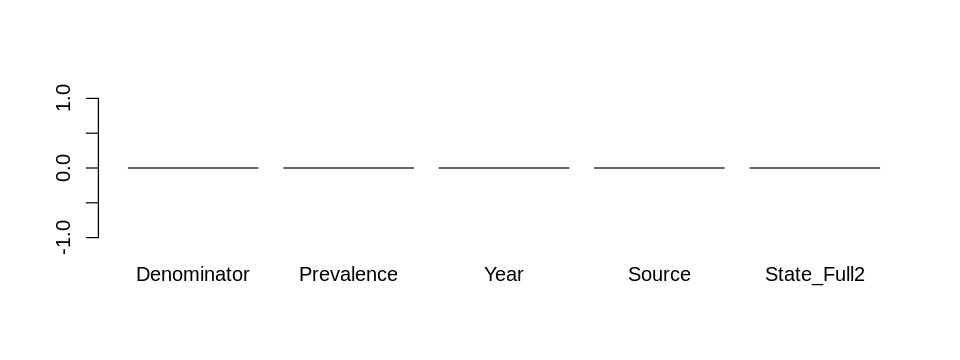

In [82]:
# Check whether each columns got missing value:
lapply(ASD_State_4_MLR, function(col_x)sum(is.na(col_x)))
       
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=3)
barplot(apply(ASD_State_4_MLR, 2, function(col_x)sum(is.na(col_x))))

**Build Multiple PLR model: + I(Year^2) + I(log(Denominator)**

In [83]:
fit_model_MPR = lm(Prevalence ~ . + I(Year^2) + I(log(Denominator)), data = ASD_State_4_MPR) # "~." means all other variables, including factors
#
summary(fit_model_MPR)


Call:
lm(formula = Prevalence ~ . + I(Year^2) + I(log(Denominator)), 
    data = ASD_State_4_MPR)

Residuals:
   Min     1Q Median     3Q    Max 
-9.697 -1.238  0.007  1.157 19.672 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         7.908e+04  1.309e+04   6.044 1.86e-09 ***
Denominator                         2.074e-06  2.340e-07   8.863  < 2e-16 ***
Year                               -7.943e+01  1.304e+01  -6.093 1.38e-09 ***
Sourcemedi                          8.189e-01  6.860e-01   1.194 0.232812    
Sourcensch                          8.667e-02  7.138e-01   0.121 0.903371    
Sourcesped                          2.740e-01  8.268e-01   0.331 0.740399    
State_Full2AL-Alabama               4.765e+00  7.495e-01   6.357 2.66e-10 ***
State_Full2AR-Arkansas              1.978e+00  7.178e-01   2.755 0.005930 ** 
State_Full2AZ-Arizona               4.043e+00  7.703e-01   5.248 1.74e-07 ***
State_Full2CA-Californ

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <p>
        Adjusted $R^2$ = 0.7884
    </p>
</div>


**Mutiple PLR Prediciton**

In [84]:
# Copy datastructure
newdata = subset(ASD_State_4_MPR, ASD_State_4_MPR$Year == 2016 &
                            ASD_State_4_MPR$State_Full2 == 'FL-Florida' & 
                            ASD_State_4_MPR$Source == 'sped')
newdata

Denominator Prevalence Year Source State_Full2
1652 2555399     12.1       2016 sped   FL-Florida

In [85]:
newdata = ASD_State_4_MPR[1,] # Copy datastructure
newdata$Prevalence = NA
newdata$Denominator = 2600000
newdata$Year = 2025
newdata$Source = "sped"
newdata$State_Full2 = "FL-Florida"

newdata

Denominator Prevalence Year Source State_Full2
1 2600000     NA         2025 sped   FL-Florida

In [86]:
predict(fit_model_MPR, newdata, interval = "predict")
#
cat("Predicted ASD Prevalence of Year [", newdata$Year, "] is", round(predict(fit_model_MPR,newdata), 1), "per 1,000 Children")


fit      lwr      upr     
1 22.70557 17.01847 28.39267

Predicted ASD Prevalence of Year [ 2025 ] is 22.7 per 1,000 Children

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
    <h3>
        Quiz:
    </h3>
    <p>
        Compare predicted ASD prevalence and model $R^2$ between: Multiple Linear Rregression and Multiple Polynomial Rregression.
    </p>
    <p>
        Which prediction result would you use? Provide yor justifications.
    </p>
</div>

In [87]:
# Write your code below and press Shift+Enter to execute 


Double-click <b>here</b> for the solution.

<!-- The answer is below:

# Write your code below and press Shift+Enter to execute 
# TBD

-->

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="" width="750" align="center">
    </a>
</div>



## <span style="color:blue">Linear Model: Logistic Regression (LR)</span>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Linear Model: Logistic Regression (LR) - Workshop Task
    </h3>
</div>


**Workshop Task:**

1. a.	Get the data.

2. b.	Logistic regression - Binary Class.

3. c.	Logistic regression - Multi-Class.


**LR Workshop Task: <span style="color:blue">1. a. Get the data.</span>**

**Use Case Data: <span style="color:blue">"../dataset/ADV_ASD_State_R.csv"</span>**

**Read in CSV data, storing as R <span style="color:blue">dataframe</span>**

In [88]:
# Read back in above saved file:
# ASD_State <- read.csv("../dataset/ADV_ASD_State_R.csv")
# ASD_State$Year_Factor <- factor(ASD_State$Year_Factor, ordered = TRUE) # Convert Year_Factor to ordered.factor
# ASD_State$Prevalence_Risk2 = factor(ASD_State$Prevalence_Risk2, ordered=TRUE, levels=c("Low", "High"))
# ASD_State$Prevalence_Risk4 = factor(ASD_State$Prevalence_Risk4, ordered=TRUE, levels=c("Low", "Medium", "High", "Very High"))


In [89]:
head(ASD_State)

State Denominator Prevalence Lower.CI Upper.CI Year Source
1 AZ    45322       6.5        5.8       7.3     2000 addm  
2 GA    43593       6.5        5.8       7.3     2000 addm  
3 MD    21532       5.5        4.6       6.6     2000 addm  
4 NJ    29714       9.9        8.9      11.1     2000 addm  
5 SC    24535       6.3        5.4       7.4     2000 addm  
6 WV    23065       4.5        3.7       5.5     2000 addm  
  Source_Full1                                           State_Full1   
1 Autism & Developmental Disabilities Monitoring Network Arizona       
2 Autism & Developmental Disabilities Monitoring Network Georgia       
3 Autism & Developmental Disabilities Monitoring Network Maryland      
4 Autism & Developmental Disabilities Monitoring Network New Jersey    
5 Autism & Developmental Disabilities Monitoring Network South Carolina
6 Autism & Developmental Disabilities Monitoring Network West Virginia 
  State_Full2       ... Hispanic.Upper.CI Asian.or.Pacific.Islander.Prevalence
1 AZ-Arizona        ... NA                NA                                  
2 GA-Georgia        ... NA                NA                                  
3 MD-Maryland       ... NA                NA                                  
4 NJ-New Jersey     ... NA                NA                                  
5 SC-South Carolina ... NA                NA                                  
6 WV-West Virginia  ... NA                NA                                  
  Asian.or.Pacific.Islander.Lower.CI Asian.or.Pacific.Islander.Upper.CI
1 NA                                 NA                                
2 NA                                 NA                                
3 NA                                 NA                                
4 NA                                 NA                                
5 NA                                 NA                                
6 NA                                 NA                                
  State_Region       Source_UC
1 D8 Mountain        ADDM     
2 D5 South Atlantic  ADDM     
3 D5 South Atlantic  ADDM     
4 D2 Middle Atlantic ADDM     
5 D5 South Atlantic  ADDM     
6 D5 South Atlantic  ADDM     
  Source_Full3                                                Prevalence_Risk2
1 ADDM Autism & Developmental Disabilities Monitoring Network High            
2 ADDM Autism & Developmental Disabilities Monitoring Network High            
3 ADDM Autism & Developmental Disabilities Monitoring Network High            
4 ADDM Autism & Developmental Disabilities Monitoring Network High            
5 ADDM Autism & Developmental Disabilities Monitoring Network High            
6 ADDM Autism & Developmental Disabilities Monitoring Network Low             
  Prevalence_Risk4 Year_Factor
1 Medium           2000       
2 Medium           2000       
3 Medium           2000       
4 Medium           2000       
5 Medium           2000       
6 Low              2000

In [90]:
Column_Names = c("Prevalence_Risk2", "Denominator", "Year", "Source", "State_Full2")
ASD_State_4_LR_Risk2 <- ASD_State[ , (names(ASD_State) %in% Column_Names)]
dim(ASD_State_4_LR_Risk2)
head(ASD_State_4_LR_Risk2)

[1] 1692    5

Denominator Year Source State_Full2       Prevalence_Risk2
1 45322       2000 addm   AZ-Arizona        High            
2 43593       2000 addm   GA-Georgia        High            
3 21532       2000 addm   MD-Maryland       High            
4 29714       2000 addm   NJ-New Jersey     High            
5 24535       2000 addm   SC-South Carolina High            
6 23065       2000 addm   WV-West Virginia  Low

In [91]:
Column_Names = c("Prevalence_Risk4", "Denominator", "Year", "Source", "State_Full2")
ASD_State_4_LR_Risk4 <- ASD_State[ , (names(ASD_State) %in% Column_Names)]
dim(ASD_State_4_LR_Risk4)
head(ASD_State_4_LR_Risk4)

[1] 1692    5

Denominator Year Source State_Full2       Prevalence_Risk4
1 45322       2000 addm   AZ-Arizona        Medium          
2 43593       2000 addm   GA-Georgia        Medium          
3 21532       2000 addm   MD-Maryland       Medium          
4 29714       2000 addm   NJ-New Jersey     Medium          
5 24535       2000 addm   SC-South Carolina Medium          
6 23065       2000 addm   WV-West Virginia  Low

---

**LR Workshop Task: <span style="color:blue">2. b.	Logistic regression (LR) Binary Class.</span>** (Reuse Multiple Polynomial Model on categorical dependent variable.)


 Low High 
 740  952 

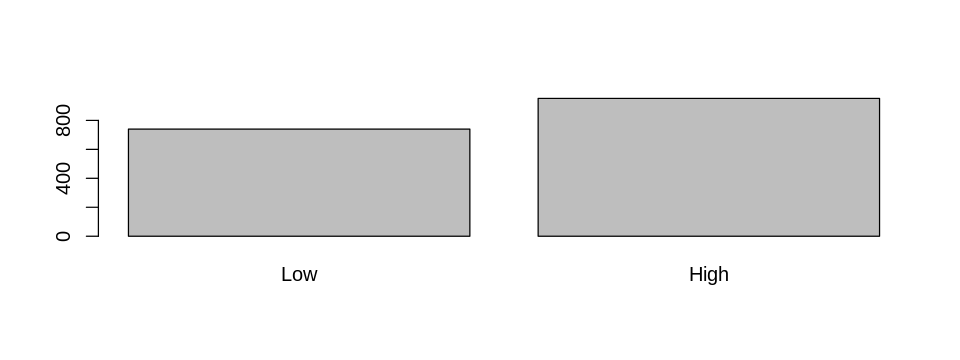

In [92]:
table(ASD_State_4_LR_Risk2$Prevalence_Risk2)
barplot(table(ASD_State_4_LR_Risk2$Prevalence_Risk2))

      
       addm medi nsch sped
  Low     5  344    0  391
  High   81  311   98  462

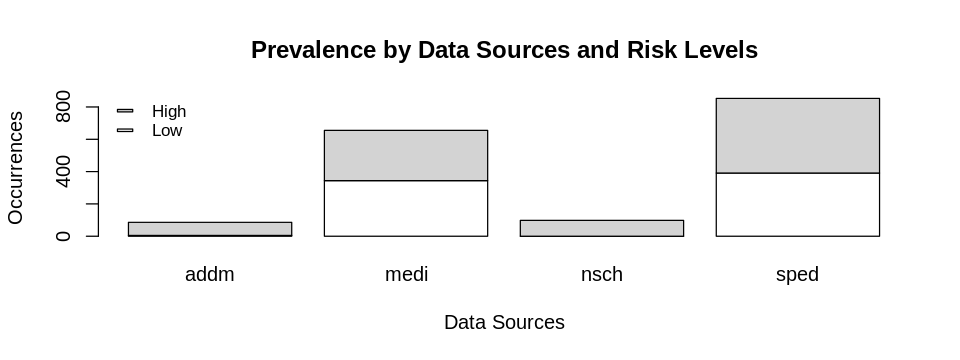

In [93]:
counts = table(ASD_State_4_LR_Risk2$Prevalence_Risk2, ASD_State_4_LR_Risk2$Source)
counts
barplot(counts,
        main="Prevalence by Data Sources and Risk Levels",
        xlab="Data Sources",
        ylab="Occurrences",
        col=c("white", "lightgrey"),
        legend = rownames(counts), 
        args.legend = list(x = "topleft", bty = "n", cex = 0.85, y.intersp = 4))


In [94]:
str(ASD_State_4_LR_Risk2)

'data.frame':	1692 obs. of  5 variables:
 $ Denominator     : int  45322 43593 21532 29714 24535 23065 35472 45113 36472 11020 ...
 $ Year            : int  2000 2000 2000 2000 2000 2000 2002 2002 2002 2002 ...
 $ Source          : Factor w/ 4 levels "addm","medi",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ State_Full2     : Factor w/ 51 levels "AK-Alaska","AL-Alabama",..: 4 11 21 32 41 50 2 4 3 6 ...
 $ Prevalence_Risk2: Ord.factor w/ 2 levels "Low"<"High": 2 2 2 2 2 1 1 2 2 2 ...


**Build model**

In [95]:
# Binary Classification:
fit_model_LR_Risk2 = glm(Prevalence_Risk2 ~ Denominator + Year + Source + State_Full2 + I(Year^2) + I(log(Denominator)), 
                         family=binomial(link='logit'), data = ASD_State_4_LR_Risk2)
#
summary(fit_model_LR_Risk2)


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = Prevalence_Risk2 ~ Denominator + Year + Source + 
    State_Full2 + I(Year^2) + I(log(Denominator)), family = binomial(link = "logit"), 
    data = ASD_State_4_LR_Risk2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1715  -0.2765   0.0036   0.2843   2.9153  

Coefficients:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         3.555e+04  2.844e+04   1.250 0.211249    
Denominator                         3.855e-06  5.131e-07   7.514 5.75e-14 ***
Year                               -3.614e+01  2.834e+01  -1.275 0.202284    
Sourcemedi                          1.381e+00  1.290e+00   1.071 0.284340    
Sourcensch                          6.822e+00  4.151e+02   0.016 0.986887    
Sourcesped                          1.242e+00  1.610e+00   0.771 0.440412    
State_Full2AL-Alabama               2.623e+00  1.182e+00   2.219 0.026454 *  
State_Full2AR-Arkansas              3.721e+00  1.108e+00

**Evaluate model**

In [96]:
# Likelihood ratio test: significance of the difference between the full model and the null model.
pchisq(fit_model_LR_Risk2$null.deviance - fit_model_LR_Risk2$deviance, 
       fit_model_LR_Risk2$df.null - fit_model_LR_Risk2$df.residual, lower.tail = FALSE)


[1] 1.533547e-271

**Check whether above value is very small (the smaller the more significant), e.g. < 0.05.**

< How to perform a Logistic Regression in R > Michy Alice

https://www.r-bloggers.com/how-to-perform-a-logistic-regression-in-r/


In [97]:
# null deviance and the residual deviance
anova(fit_model_LR_Risk2, test="Chisq")

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Df Deviance   Resid. Df Resid. Dev Pr(>Chi)     
NULL                NA         NA 1691      2318.9775             NA
Denominator          1   3.537393 1690      2315.4401   5.999971e-02
Year                 1 799.973390 1689      1515.4667  5.468229e-176
Source               3 130.380991 1686      1385.0857   4.476806e-28
State_Full2         50 503.146385 1636       881.9393   4.071306e-76
I(Year^2)            1   3.124751 1635       878.8146   7.711166e-02
I(log(Denominator))  1  37.914698 1634       840.8999   7.390635e-10

In [98]:
# R^2 equivalent
if(!require(pscl)){install.packages("pscl")}
library("pscl")

Loading required package: pscl
Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis


While no exact equivalent to the $R^2$ of linear regression exists, the **McFadden $R^2$** index can be used to assess the model fit.

In [99]:
# R^2 equivalent
pR2(fit_model_LR_Risk2)[4]

McFadden 
0.6373833

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <p>
        McFadden $R^2$ = 0.6374
    </p>
</div>


---

**LR Workshop Task: <span style="color:blue">3. c.	Logistic regression (LR) Muti-Class.</span>** (Reuse Multiple Polynomial Model on categorical dependent variable.)


      Low    Medium      High Very High 
      740       584       294        74 

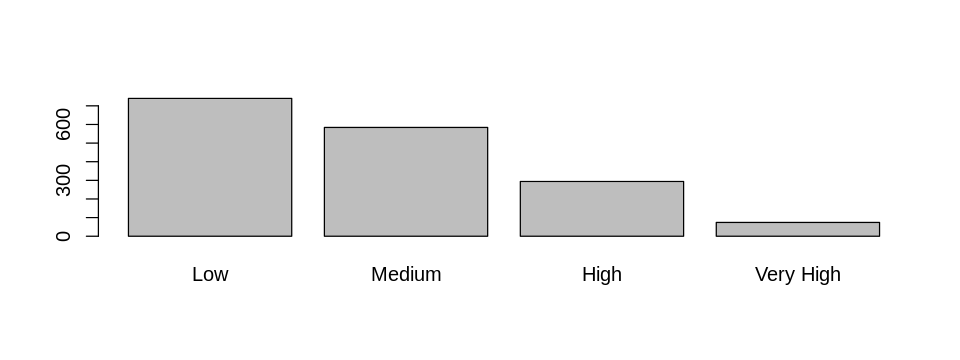

In [100]:
table(ASD_State_4_LR_Risk4$Prevalence_Risk4)
barplot(table(ASD_State_4_LR_Risk4$Prevalence_Risk4))

           
            addm medi nsch sped
  Low          5  344    0  391
  Medium      36  225    5  318
  High        38   74   38  144
  Very High    7   12   55    0

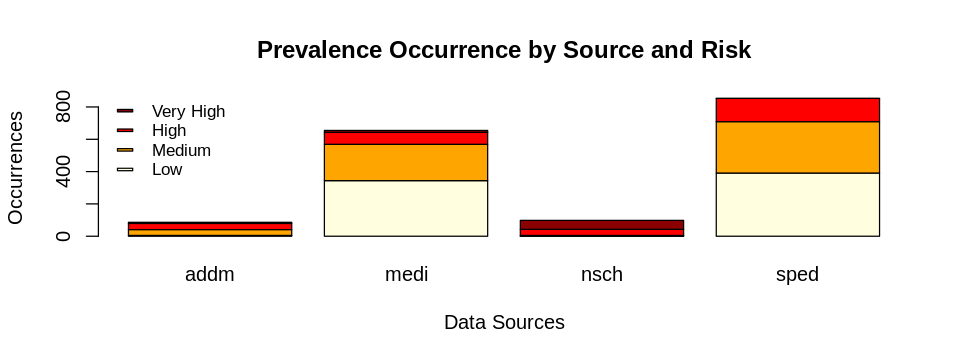

In [101]:
counts = table(ASD_State_4_LR_Risk4$Prevalence_Risk4, ASD_State_4_LR_Risk4$Source)
counts
barplot(counts,
        main="Prevalence Occurrence by Source and Risk",
        xlab="Data Sources",
        ylab="Occurrences",
        col=c("lightyellow", "orange", "red","darkred"),
        legend = rownames(counts), 
        args.legend = list(x = "topleft", bty = "n", cex = 0.85, y.intersp = 4))


**Build model**

In [102]:
# multinom function from the nnet package 
if(!require(nnet)){install.packages("nnet")}
library("nnet")

Loading required package: nnet


In [103]:
# Multi-Class Classification:
fit_model_LR_Risk4 = multinom(Prevalence_Risk4 ~ Denominator + Year + Source + State_Full2 + I(Year^2) + I(log(Denominator)), 
                     data = ASD_State_4_LR_Risk4, maxit=1000) # maxit https://cran.r-project.org/web/packages/nnet/nnet.pdf

summary(fit_model_LR_Risk4)


# weights:  236 (174 variable)
initial  value 2345.610059 
iter  10 value 1642.176333
iter  20 value 1287.779160
iter  30 value 1107.430631
iter  40 value 921.386084
iter  50 value 890.347795
iter  60 value 812.517810
iter  70 value 808.708251
iter  80 value 790.145541
iter  90 value 789.356983
iter  90 value 789.356983
iter 100 value 788.697764
iter 110 value 788.263896
iter 120 value 787.147810
iter 120 value 787.147808
iter 130 value 785.704645
iter 130 value 785.704644
iter 140 value 785.135020
iter 140 value 785.135020
iter 150 value 784.905675
iter 150 value 784.905675
iter 160 value 784.812617
iter 160 value 784.812617
iter 170 value 784.774742
iter 170 value 784.774742
iter 180 value 784.759309
iter 180 value 784.759309
iter 190 value 784.753016
iter 190 value 784.753016
iter 200 value 784.750451
iter 200 value 784.750451
iter 210 value 784.749404
iter 210 value 784.749404
iter 220 value 784.748978
iter 220 value 784.748978
iter 230 value 784.748804
iter 230 value 784.748804
fi

Call:
multinom(formula = Prevalence_Risk4 ~ Denominator + Year + Source + 
    State_Full2 + I(Year^2) + I(log(Denominator)), data = ASD_State_4_LR_Risk4, 
    maxit = 1000)

Coefficients:
            (Intercept)  Denominator       Year Sourcemedi Sourcensch
Medium    -0.0004007338 2.315392e-06 -0.6177611 -0.3983914   1.288252
High      -0.0012785664 4.217311e-06 -1.1823721 -2.5260908   0.260585
Very High -0.0011016480 4.541402e-06 -1.6324251  2.4329304  -3.579447
          Sourcesped State_Full2AL-Alabama State_Full2AR-Arkansas
Medium    -0.5741604              0.259656             1.55153213
High      -4.1602188              1.793057            -0.04348038
Very High -6.7861902              6.666128            -2.13524747
          State_Full2AZ-Arizona State_Full2CA-California State_Full2CO-Colorado
Medium                1.6167595                -4.909023             -0.9979121
High                  2.5982487                -9.553742             -2.3874541
Very High             0.518

< MULTINOMIAL LOGISTIC REGRESSION | R DATA ANALYSIS EXAMPLES >

https://stats.idre.ucla.edu/r/dae/multinomial-logistic-regression/

In [104]:
## extract the coefficients from the model and exponentiate
exp(coef(fit_model_LR_Risk4))
# Uncomment below to display all p values:
# paste(exp(coef(fit_model)))

(Intercept) Denominator Year      Sourcemedi  Sourcensch Sourcesped 
Medium    0.9995993   1.000002    0.5391502  0.67139922 3.62644214 0.563177522
High      0.9987223   1.000004    0.3065507  0.07997104 1.29768902 0.015604143
Very High 0.9988990   1.000005    0.1954550 11.39221703 0.02789111 0.001129263
          State_Full2AL-Alabama State_Full2AR-Arkansas State_Full2AZ-Arizona
Medium      1.296484            4.7186943               5.036742            
High        6.007789            0.9574513              13.440179            
Very High 785.348612            0.1182153               1.679249            
          State_Full2CA-California ... State_Full2TX-Texas State_Full2UT-Utah
Medium    7.379693e-03             ... 1.851691e-02        0.65865543        
High      7.093535e-05             ... 4.106477e-05        0.19297616        
Very High 1.930908e-04             ... 1.965154e-01        0.09997974        
          State_Full2VA-Virginia State_Full2VT-Vermont State_Full2WA-Washington
Medium     2.201387               2.414509             0.7770248               
High      15.837048              48.466974             0.6647771               
Very High  2.610966              47.826518             0.8393112               
          State_Full2WI-Wisconsin State_Full2WV-West Virginia
Medium     70.08045                2.563975                  
High      134.15860                7.816731                  
Very High  20.15031               10.431243                  
          State_Full2WY-Wyoming I(Year^2) I(log(Denominator))
Medium    0.147121636           1.000314  0.15168154         
High      0.025792134           1.000597  0.07116099         
Very High 0.001564424           1.000826  0.00591553

In [105]:
# Test the significance/importance of each coefficient (check if p values < 0.05)

# z score for coefficients
z <- summary(fit_model_LR_Risk4)$coefficients/summary(fit_model_LR_Risk4)$standard.errors
cat('\n< Talbe of coefficient z scores>')
z

# p value of 2-tailed z test
p <- (1 - pnorm(abs(z), 0, 1)) * 2
cat('\n< Talbe of coefficient p values>')
p
# Uncomment below to display all p values:
# paste(p)


< Talbe of coefficient z scores>

(Intercept)   Denominator Year         Sourcemedi    Sourcensch   
Medium     -61605204332 22.77665    -47431585791 -3.574096e+11  5.516405e+12
High      -103347504827 29.75500    -56434165146 -1.080017e+12  9.680944e+10
Very High  -70795238650  2.72952    -50871679968  7.376106e+11 -1.223631e+12
          Sourcesped    State_Full2AL-Alabama State_Full2AR-Arkansas
Medium    -9.518100e+11 5.631040e+11           6.414641e+13         
High      -8.591119e+12 3.547224e+12          -9.884141e+11         
Very High -9.905923e+13 6.225476e+12          -2.497586e+13         
          State_Full2AZ-Arizona State_Full2CA-California ...
Medium    3.689674e+13          -7.948178e+13            ...
High      7.329104e+13          -6.081924e+13            ...
Very High 6.152456e+12          -1.310428e+14            ...
          State_Full2TX-Texas State_Full2UT-Utah State_Full2VA-Virginia
Medium    -2.836206e+14       -1.742348e+13      3.100723e+13          
High      -2.870802e+14       -1.747397e+13      4.713459e+13          
Very High -1.445080e+13       -1.642721e+13      1.106358e+13          
          State_Full2VT-Vermont State_Full2WA-Washington
Medium    1.907691e+13          -9.119890e+12           
High      1.538141e+14          -6.026990e+12           
Very High 3.891825e+13          -1.862163e+12           
          State_Full2WI-Wisconsin State_Full2WV-West Virginia
Medium    8.193619e+13            1.699371e+14               
High      1.130242e+14            5.492476e+13               
Very High 2.980451e+13            1.612144e+14               
          State_Full2WY-Wyoming I(Year^2) I(log(Denominator))
Medium    -2.850957e+14         12009.53  -978148399523      
High      -3.573347e+14         15617.24  -187366682293      
Very High -2.574934e+14         12149.77  -287140725316


< Talbe of coefficient p values>

(Intercept) Denominator Year Sourcemedi Sourcensch Sourcesped
Medium    0           0.000000000 0    0          0          0         
High      0           0.000000000 0    0          0          0         
Very High 0           0.006342669 0    0          0          0         
          State_Full2AL-Alabama State_Full2AR-Arkansas State_Full2AZ-Arizona
Medium    0                     0                      0                    
High      0                     0                      0                    
Very High 0                     0                      0                    
          State_Full2CA-California ... State_Full2TX-Texas State_Full2UT-Utah
Medium    0                        ... 0                   0                 
High      0                        ... 0                   0                 
Very High 0                        ... 0                   0                 
          State_Full2VA-Virginia State_Full2VT-Vermont State_Full2WA-Washington
Medium    0                      0                     0                       
High      0                      0                     0                       
Very High 0                      0                     0                       
          State_Full2WI-Wisconsin State_Full2WV-West Virginia
Medium    0                       0                          
High      0                       0                          
Very High 0                       0                          
          State_Full2WY-Wyoming I(Year^2) I(log(Denominator))
Medium    0                     0         0                  
High      0                     0         0                  
Very High 0                     0         0

While no exact equivalent to the $R^2$ of linear regression exists, the **McFadden $R^2$** index can be used to assess the model fit.

In [106]:
# R^2 equivalent
pR2(fit_model_LR_Risk4)[4]

fitting null model for pseudo-r2
# weights:  8 (3 variable)
initial  value 2345.610059 
iter  10 value 1979.347988
final  value 1979.347206 
converged


McFadden 
0.6035315

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <p>
        McFadden $R^2$ = 0.6035
    </p>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="" width="750" align="center">
    </a>
</div>



## <span style="color:blue">Linear Model: Model Evaluation</span>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Linear Model: Linear Model: Model Evaluation - Workshop Task
    </h3>
</div>


**Workshop Task:**

1. a.	Train/Test Dataset Split
2. b.	Confusion Matrix & Accuracy for Classification
3. c.	K-Fold Cross Validation
4. d.	$R^2$, MSE, RMSE for Regression for Regression

**Model Evaluation Workshop Task: <span style="color:blue">1. a.	Train/Test Dataset Split</span>**

In [107]:
if(!require(caTools)){install.packages("caTools")}
library("caTools") 

Loading required package: caTools


In [108]:
# Generate a random number sequence that can be reproduced to check results thru the seed number.
set.seed(88)

# Stratified Random Sampling: split dataset into two sets in predefined proportion (SplitRatio)
# while preserving differnt class ratios of dependent variable. (e.g. Proportion of Low/High)
split <- sample.split(ASD_State_4_LR_Risk2$Prevalence_Risk2, SplitRatio = 0.7)

In [109]:
# Get training and test data
trainset <- subset(ASD_State_4_LR_Risk2, split == TRUE) 
testset <- subset(ASD_State_4_LR_Risk2, split == FALSE)

**Build a binary classification model to predict (categorical) Prevalence Risk Level using Logistic Regression (LR)**

In [110]:
# Binary Classification:
fit_model_LR_Risk2 = glm(Prevalence_Risk2 ~ Denominator + Year + Source + State_Full2 + I(Year^2) + I(log(Denominator)), 
                         family=binomial(link='logit'), data = trainset) # data = trainset

summary(fit_model_LR_Risk2)


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = Prevalence_Risk2 ~ Denominator + Year + Source + 
    State_Full2 + I(Year^2) + I(log(Denominator)), family = binomial(link = "logit"), 
    data = trainset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2887  -0.2840   0.0000   0.2573   2.9945  

Coefficients:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         5.763e+04  3.538e+04   1.629 0.103311    
Denominator                         4.162e-06  6.157e-07   6.760 1.38e-11 ***
Year                               -5.815e+01  3.526e+01  -1.649 0.099171 .  
Sourcemedi                          1.118e+00  1.445e+00   0.774 0.439156    
Sourcensch                          1.054e+01  7.542e+02   0.014 0.988849    
Sourcesped                          7.207e-01  1.804e+00   0.399 0.689548    
State_Full2AL-Alabama               1.431e+00  1.343e+00   1.066 0.286634    
State_Full2AR-Arkansas              3.125e+00  1.264e+00   2.472 0.0

**Model Evaluation Workshop Task: <span style="color:blue">2. b.	Confusion Matrix & Accuracy for Classification</span>**

https://en.wikipedia.org/wiki/Confusion_matrix

In [111]:
# Confusion matrix on Trainset
probTrainset <- predict(fit_model_LR_Risk2, type = 'response')
# One way is to use the proportion of High risk in the *Training* data.
threshold2 <- sum(trainset$Prevalence_Risk2 == "High")/length(trainset$Prevalence_Risk2)
cat('Trainset High Risk Threshold = ', threshold2)
# If logistic regression probability > threshold, predict High, else predict Low.
predictTrainset <- ifelse(probTrainset > threshold2, "High", "Low")
# Create a contingency table (Confusion Matrix) with actuals on rows and predictions on columns.
table(trainset$Prevalence_Risk2, predictTrainset)

# Accuracy on Trainset
AccuracyTrain <- mean(predictTrainset == trainset$Prevalence_Risk2) 
cat('Trainset Accuracy = ', AccuracyTrain)

Trainset High Risk Threshold =  0.5625

      predictTrainset
       High Low
  Low    46 472
  High  593  73

Trainset Accuracy =  0.8994932

In [112]:
# Confusion matrix on Testset
probTestset <- predict(fit_model_LR_Risk2, newdata = testset, type = 'response') # newdata = testset
# One way is to use the proportion of High risk in the *Training* data.
cat('Reused Trainset High Risk Threshold = ', threshold2)
# If logistic regression probability > threshold, predict High, else predict Low.
predictTestset <- ifelse(probTestset > threshold2, "High", "Low")
# Create a contingency table (Confusion Matrix) with actuals on rows and predictions on columns.
table(testset$Prevalence_Risk2, predictTestset)

# Accuracy on Trainset
AccuracyTest <- mean(predictTestset == testset$Prevalence_Risk2) 
cat('Testset Accuracy = ', AccuracyTest)

Reused Trainset High Risk Threshold =  0.5625

      predictTestset
       High Low
  Low    30 192
  High  258  28

Testset Accuracy =  0.8858268

**Model Evaluation Workshop Task: <span style="color:blue">3. c.	K-Fold Cross Validation</span>**

### R caret package

The caret package (short for Classification And REgression Training) is a set of functions that attempt to streamline the process for creating predictive models. The package contains tools for:

* data splitting
* pre-processing
* feature selection
* model tuning using resampling
* variable importance estimation

http://topepo.github.io/caret/index.html


In [113]:
if(!require(caret)){install.packages("caret")}
library("caret")

Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [114]:
if(!require(e1071)){install.packages("e1071")}
library("e1071")

Loading required package: e1071


In [115]:
# Caret train/test split method:
set.seed(88)
caret_idx = createDataPartition(ASD_State_4_LR_Risk2$Prevalence_Risk2, p = 0.85, list = FALSE)
caret_trainset = ASD_State_4_LR_Risk2[caret_idx, ]
caret_testset  = ASD_State_4_LR_Risk2[-caret_idx, ]

#caret_threshold <- sum(caret_trainset$Prevalence_Risk2 == "Low")/length(caret_trainset$Prevalence_Risk2)
#caret_threshold

In [116]:
# Caret logistic regresion
set.seed(88)
cv_control = trainControl(method = "cv", number = 5)

caret_model_LR_Risk2 = train(form = Prevalence_Risk2 ~ ., data = caret_trainset, 
                             trControl = cv_control, method = "glm", family = "binomial")
#
caret_model_LR_Risk2

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Generalized Linear Model 

1439 samples
   4 predictor
   2 classes: 'Low', 'High' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1151, 1151, 1151, 1151, 1152 
Resampling results:

  Accuracy   Kappa    
  0.8638018  0.7237422


In [117]:
# Get predicted class label
caret_model_LR_Risk2_Pred <- predict(caret_model_LR_Risk2, caret_testset)

# Uncomment below to get class probability
# caret_model_LR_Risk2_Pred <- predict(caret_model_LR_Risk2, caret_testset, type = "prob")


https://topepo.github.io/caret/using-your-own-model-in-train.html#Illustration5

In [118]:
# CM & Acc
cm_table <- table(as.factor(caret_model_LR_Risk2_Pred), caret_testset$Prevalence_Risk2)
confusionMatrix(cm_table)

Confusion Matrix and Statistics

      
       Low High
  Low   92   11
  High  19  131
                                          
               Accuracy : 0.8814          
                 95% CI : (0.8351, 0.9185)
    No Information Rate : 0.5613          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7573          
                                          
 Mcnemar's Test P-Value : 0.2012          
                                          
            Sensitivity : 0.8288          
            Specificity : 0.9225          
         Pos Pred Value : 0.8932          
         Neg Pred Value : 0.8733          
             Prevalence : 0.4387          
         Detection Rate : 0.3636          
   Detection Prevalence : 0.4071          
      Balanced Accuracy : 0.8757          
                                          
       'Positive' Class : Low             
                                          

**Model Evaluation Workshop Task: <span style="color:blue">4. d.	$R^2$, MSE, RMSE for Regression</span>**

In [119]:
# Caret train/test split method:
set.seed(88)
caret_idx = createDataPartition(ASD_State_4_MLR$Prevalence, p = 0.85, list = FALSE)
caret_trainset = ASD_State_4_MLR[caret_idx, ]
caret_testset  = ASD_State_4_MLR[-caret_idx, ]

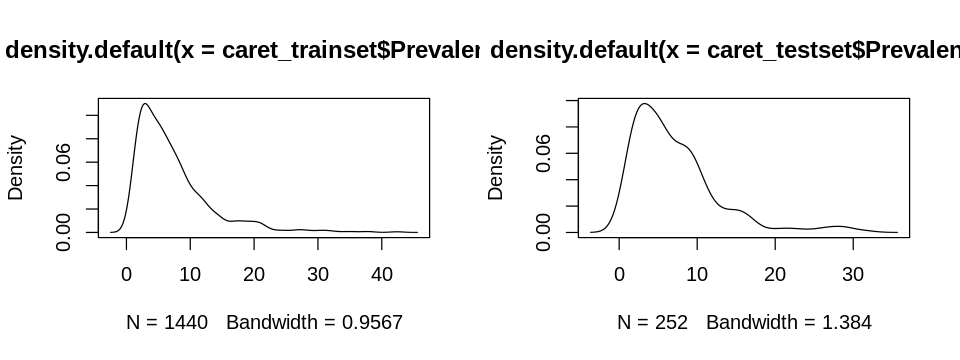

In [120]:
# Look at below plots of train and test, shape of distribution are similar, which means good sampling.
par(mfrow=c(1, 2)) 
plot(density(caret_trainset$Prevalence))
plot(density(caret_testset$Prevalence))
par(mfrow=c(1, 1))

**Build a regression model to predict (numeric) Prevalanece using Multiple Linear Regression (MLR)**

In [121]:
if(!require(elasticnet)){install.packages("elasticnet")}
library("elasticnet")

Loading required package: elasticnet
Loading required package: lars
Loaded lars 1.2



In [122]:
# Caret MLR regresion
set.seed(88)
cv_control = trainControl(method = "cv", number = 5)
#
caret_model_MLR <- train(Prevalence ~ ., data = caret_trainset, trControl = cv_control, method = "lm") 
#
caret_model_MLR

Linear Regression 

1440 samples
   4 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1151, 1152, 1151, 1154, 1152 
Resampling results:

  RMSE      Rsquared   MAE     
  2.974216  0.7446885  1.980013

Tuning parameter 'intercept' was held constant at a value of TRUE

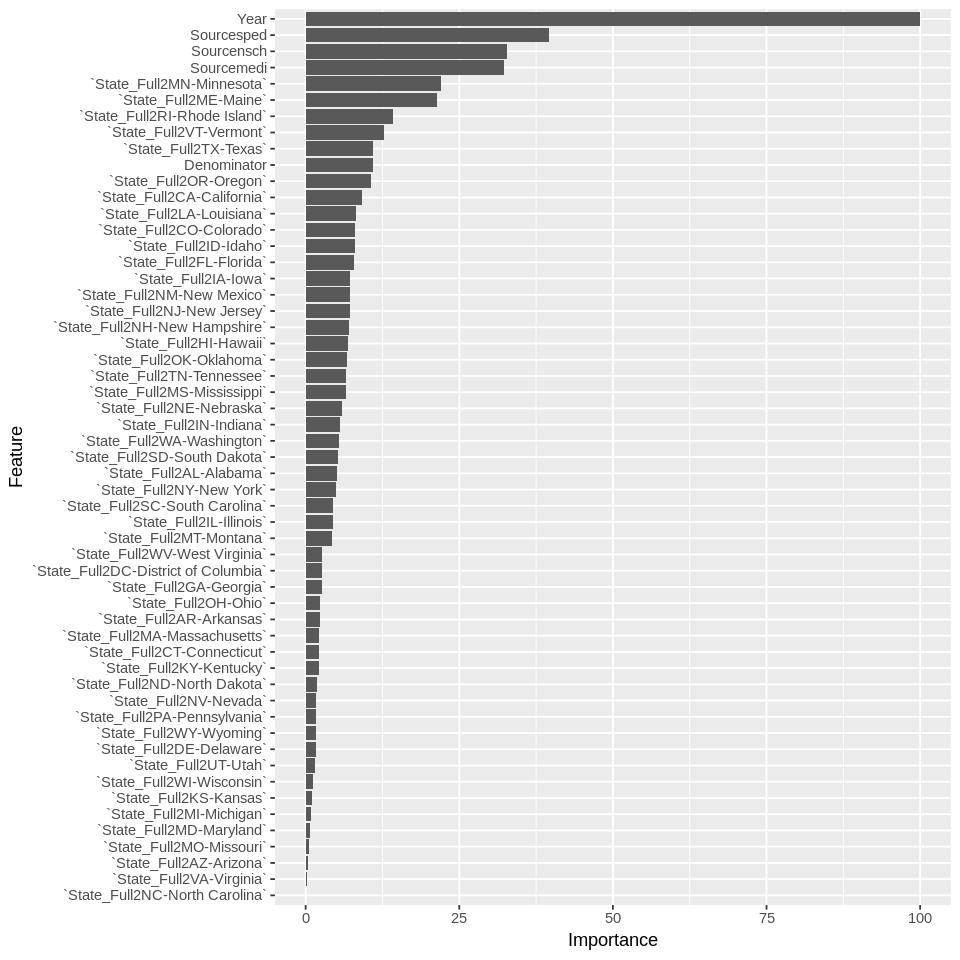

In [123]:
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=8)
ggplot(varImp(caret_model_MLR))
# plot(varImp(caret_model_MLR))

In [124]:
caret_model_MLR_Pred <- predict(caret_model_MLR, caret_testset)
head(caret_model_MLR_Pred)

22        27        33        36        41        55 
 9.389012  7.831519  9.670434 10.609628 12.070592 13.402663

In [125]:
# MSE
mean((caret_testset$Prevalence - caret_model_MLR_Pred)^2)

[1] 5.837448

In [126]:
# RMSE
sqrt(mean((caret_testset$Prevalence - caret_model_MLR_Pred)^2))

[1] 2.416081

**<span style="color:blue">Calculate $R^2$ for entire train set (all folds)</span>** https://stackoverflow.com/questions/25691127/r-squared-on-test-data

In [127]:
caret_model_MLR_Pred_Train <- predict(caret_model_MLR, caret_trainset)

SS.total      <- sum((caret_trainset$Prevalence-mean(caret_trainset$Prevalence))^2)
SS.residual   <- sum(residuals(caret_model_MLR)^2)
SS.regression <- sum((caret_model_MLR_Pred_Train-mean(caret_trainset$Prevalence))^2)

# fraction of variability explained by the model
cat("\nTrain R^2 fraction of variability explained by the model :", SS.regression/SS.total )

# caret_model_MLR_L2



Train R^2 fraction of variability explained by the model : 0.7699826

**<span style="color:blue">Calculate $R^2$ for test set</span>** https://stackoverflow.com/questions/25691127/r-squared-on-test-data

In [128]:
# True y values:
# head(caret_testset$Prevalence)

# Predicated y values (y hat):
# head(caret_model_MLR_Pred)

SS.total      <- sum((caret_testset$Prevalence - mean(caret_testset$Prevalence))^2)
SS.residual   <- sum((caret_testset$Prevalence - caret_model_MLR_Pred)^2)
SS.regression <- sum((caret_model_MLR_Pred - mean(caret_testset$Prevalence))^2)

# NOT the fraction of variability explained by the model
test.rsq <- 1 - SS.residual/SS.total  
# cat("\nNOT Test fraction of variability explained by the model :", test.rsq )

# fraction of variability explained by the model
cat("\nTest R^2 fraction of variability explained by the model :", SS.regression/SS.total )



Test R^2 fraction of variability explained by the model : 0.8988214

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="" width="750" align="center">
    </a>
</div>



## <span style="color:blue">Linear Model: Prevent Overfitting by Regularization Methods</span>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Linear Model: Prevent Overfitting by Regularization Methods - L1 Lasso Regression & L2 Ridge regression
    </h3>
</div>


https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

* L1 Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.

* L2 Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. 

The key difference between these techniques is that L1 Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.


https://towardsdatascience.com/create-predictive-models-in-r-with-caret-12baf9941236

**Enhanced MLR using Regularization: L1 Lasso**

In [129]:
if(!require(elasticnet)){install.packages("elasticnet")}
library("elasticnet")

In [130]:
# Caret MLR with Regularization
# possible method: boot", "boot632", "cv", "repeatedcv", "LOOCV", "LGOCV"
cv_control <- trainControl(method = "repeatedcv",   
                           number = 10,     # number of folds
                           repeats = 5)    # repeated N times

caret_model_MLR_L1 <- train(Prevalence ~ .,
               data = caret_trainset,
               method = "lasso",  # Try using "ridge"
               trControl = cv_control,
               preProcess = c('scale', 'center'))  # Auto pre-process data
#
caret_model_MLR_L1

The lasso 

1440 samples
   4 predictor

Pre-processing: scaled (55), centered (55) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1296, 1295, 1296, 1296, 1296, 1296, ... 
Resampling results across tuning parameters:

  fraction  RMSE      Rsquared   MAE     
  0.1       4.586996  0.5968962  3.264324
  0.5       3.141998  0.7206010  2.138362
  0.9       2.925833  0.7546077  1.966103

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was fraction = 0.9.

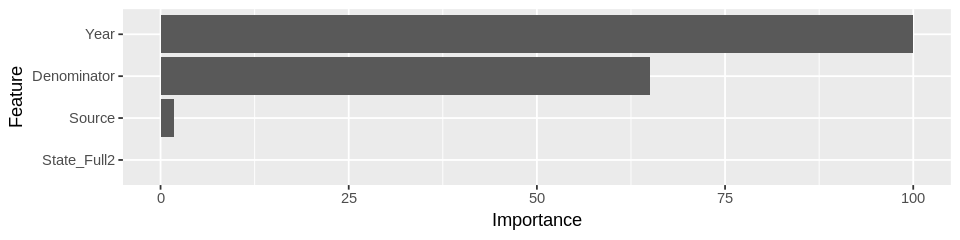

In [131]:
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=2)
ggplot(varImp(caret_model_MLR_L1))
# plot(varImp(caret_model_MLR_L1))

In [132]:
caret_model_MLR_Pred <- predict(caret_model_MLR_L1, caret_testset)
head(caret_model_MLR_Pred)

22        27        33        36        41        55 
 9.095595  7.657583  9.711652 10.420214 11.766911 13.097625

In [133]:
# MSE
mean((caret_testset$Prevalence - caret_model_MLR_Pred)^2)

[1] 5.900344

In [134]:
# RMSE
sqrt(mean((caret_testset$Prevalence - caret_model_MLR_Pred)^2))

[1] 2.429062

**<span style="color:blue">Calculate $R^2$ for entire train set (all folds)</span>** https://stackoverflow.com/questions/25691127/r-squared-on-test-data

In [135]:
caret_model_MLR_Pred_Train <- predict(caret_model_MLR_L1, caret_trainset)

SS.total      <- sum((caret_trainset$Prevalence-mean(caret_trainset$Prevalence))^2)
SS.residual   <- sum(residuals(caret_model_MLR_L1)^2)
SS.regression <- sum((caret_model_MLR_Pred_Train-mean(caret_trainset$Prevalence))^2)

# fraction of variability explained by the model
cat("\nTrain R^2 fraction of variability explained by the model :", SS.regression/SS.total )

# caret_model_MLR_L2



Train R^2 fraction of variability explained by the model : 0.7498116

**<span style="color:blue">Calculate $R^2$ for test set</span>** https://stackoverflow.com/questions/25691127/r-squared-on-test-data

In [136]:
# True y values:
# head(caret_testset$Prevalence)

# Predicated y values (y hat):
# head(caret_model_MLR_Pred)

SS.total      <- sum((caret_testset$Prevalence - mean(caret_testset$Prevalence))^2)
SS.residual   <- sum((caret_testset$Prevalence - caret_model_MLR_Pred)^2)
SS.regression <- sum((caret_model_MLR_Pred - mean(caret_testset$Prevalence))^2)

# NOT the fraction of variability explained by the model
test.rsq <- 1 - SS.residual/SS.total  
# cat("\nNOT Test fraction of variability explained by the model :", test.rsq )

# fraction of variability explained by the model
cat("\nTest R^2 fraction of variability explained by the model :", SS.regression/SS.total )



Test R^2 fraction of variability explained by the model : 0.8798161

---

**Enhanced MLR using Regularization: L2 Ridge**

In [137]:
# Caret MLR with Regularization
# possible method: boot", "boot632", "cv", "repeatedcv", "LOOCV", "LGOCV"
cv_control <- trainControl(method = "repeatedcv",   
                           number = 10,     # number of folds
                           repeats = 5)    # repeated N times

caret_model_MLR_L2 <- train(Prevalence ~ .,
               data = caret_trainset,
               method = "ridge",  # Try using "lasso"
               trControl = cv_control,
               preProcess = c('scale', 'center'))  # Auto pre-process data
#
caret_model_MLR_L2

Ridge Regression 

1440 samples
   4 predictor

Pre-processing: scaled (55), centered (55) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1296, 1297, 1296, 1297, 1295, 1296, ... 
Resampling results across tuning parameters:

  lambda  RMSE      Rsquared   MAE     
  0e+00   2.951386  0.7509153  1.966418
  1e-04   2.951369  0.7509168  1.966466
  1e-01   3.000216  0.7427197  2.048206

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was lambda = 1e-04.

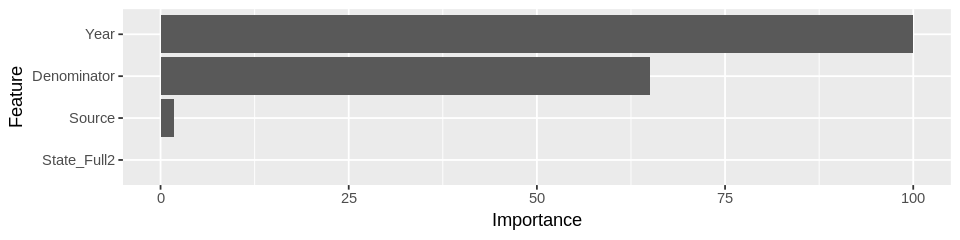

In [138]:
# Adjust in-line plot size to M x N
options(repr.plot.width=8, repr.plot.height=2)
ggplot(varImp(caret_model_MLR_L2))
# plot(varImp(caret_model_MLR_L2))

In [139]:
caret_model_MLR_Pred <- predict(caret_model_MLR_L2, caret_testset)
head(caret_model_MLR_Pred)

22        27        33        36        41        55 
 9.384760  7.826531  9.667148 10.606323 12.066339 13.398437

In [140]:
# MSE
mean((caret_testset$Prevalence - caret_model_MLR_Pred)^2)

[1] 5.838206

In [141]:
# RMSE
sqrt(mean((caret_testset$Prevalence - caret_model_MLR_Pred)^2))

[1] 2.416238

**<span style="color:blue">Calculate $R^2$ for entire train set (all folds)</span>** https://stackoverflow.com/questions/25691127/r-squared-on-test-data

In [142]:
caret_model_MLR_Pred_Train <- predict(caret_model_MLR_L2, caret_trainset)

SS.total      <- sum((caret_trainset$Prevalence-mean(caret_trainset$Prevalence))^2)
SS.residual   <- sum(residuals(caret_model_MLR_L2)^2)
SS.regression <- sum((caret_model_MLR_Pred_Train-mean(caret_trainset$Prevalence))^2)

# fraction of variability explained by the model
cat("\nTrain R^2 fraction of variability explained by the model :", SS.regression/SS.total )

# caret_model_MLR_L2



Train R^2 fraction of variability explained by the model : 0.7699436

**<span style="color:blue">Calculate $R^2$ for test set</span>** https://stackoverflow.com/questions/25691127/r-squared-on-test-data

In [143]:
# True y values:
# head(caret_testset$Prevalence)

# Predicated y values (y hat):
# head(caret_model_MLR_Pred)

SS.total      <- sum((caret_testset$Prevalence - mean(caret_testset$Prevalence))^2)
SS.residual   <- sum((caret_testset$Prevalence - caret_model_MLR_Pred)^2)
SS.regression <- sum((caret_model_MLR_Pred - mean(caret_testset$Prevalence))^2)

# NOT the fraction of variability explained by the model
test.rsq <- 1 - SS.residual/SS.total  
# cat("\nNOT Test fraction of variability explained by the model :", test.rsq )

# fraction of variability explained by the model
cat("\nTest R^2 fraction of variability explained by the model :", SS.regression/SS.total )



Test R^2 fraction of variability explained by the model : 0.8987872

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="" width="750" align="center">
    </a>
</div>



## <span style="color:blue">Workshop Submission</span>


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
    <h3>
        What to submit?
    </h3>
    <p>
        Create predictive model for Multi Class Classification of ASD Prevalence Risk Level (Low, Medium, High, Very High) using Caret package's multinom logistic regression algorithm.
    </p>
</div>

References:

https://daviddalpiaz.github.io/r4sl/the-caret-package.html

http://topepo.github.io/caret/index.html

https://cran.r-project.org/web/packages/caret/caret.pdf


In [144]:
# Code example of multinomial logistic regresion using Iris flower dataset
iris[c(1:3, 51:53, 101:103), ]
summary(iris)
iris_model = train(Species ~ ., data = iris, method = "multinom", 
                     trControl = trainControl(method = "cv", number = 5), trace = FALSE)
iris_model

Sepal.Length Sepal.Width Petal.Length Petal.Width Species   
1   5.1          3.5         1.4          0.2         setosa    
2   4.9          3.0         1.4          0.2         setosa    
3   4.7          3.2         1.3          0.2         setosa    
51  7.0          3.2         4.7          1.4         versicolor
52  6.4          3.2         4.5          1.5         versicolor
53  6.9          3.1         4.9          1.5         versicolor
101 6.3          3.3         6.0          2.5         virginica 
102 5.8          2.7         5.1          1.9         virginica 
103 7.1          3.0         5.9          2.1         virginica

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

Penalized Multinomial Regression 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 120, 120, 120, 120, 120 
Resampling results across tuning parameters:

  decay  Accuracy   Kappa
  0e+00  0.9533333  0.93 
  1e-04  0.9600000  0.94 
  1e-01  0.9733333  0.96 

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was decay = 0.1.

In [145]:
# Write your code below and press Shift+Enter to execute 


Double-click <b>here</b> for the solution.

<!-- The answer is below:

# Write your code below and press Shift+Enter to execute 
#
# < Multi Class Classification of ASD Prevalence Risk Level >
#
# ----------------------------------
# Caret train/test split method:
# ----------------------------------
set.seed(88)
caret_idx = createDataPartition(ASD_State_4_LR_Risk4$Prevalence_Risk4, p = 0.85, list = FALSE)
caret_trainset = ASD_State_4_LR_Risk4[caret_idx, ]
caret_testset  = ASD_State_4_LR_Risk4[-caret_idx, ]

# ----------------------------------
# Caret multinomial logistic regresion
# ----------------------------------
# Cross Validation setting
set.seed(88)
cv_control = trainControl(method = "cv", number = 5)
# Train model
caret_model_LR_Risk4 = train(form = Prevalence_Risk4 ~ ., data = caret_trainset, 
                             trControl = cv_control, method = "multinom", trace = FALSE)
#                             trControl = cv_control, method = "glm", family = "binomial")

# ----------------------------------
# Summary of model
# ----------------------------------
caret_model_LR_Risk4

# ----------------------------------
# Get predicted class label
# ----------------------------------
caret_model_LR_Risk4_Pred <- predict(caret_model_LR_Risk4, caret_testset)
head(caret_model_LR_Risk4_Pred)

# ----------------------------------
# Get predicted class probability
# ----------------------------------
caret_model_LR_Risk4_Pred_Prob <- predict(caret_model_LR_Risk4, caret_testset, type = "prob")
head(caret_model_LR_Risk4_Pred_Prob)

# ----------------------------------
# CM & Acc
# ----------------------------------
cm_table <- table(as.factor(caret_model_LR_Risk4_Pred), caret_testset$Prevalence_Risk4)
confusionMatrix(cm_table)


-->

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="" width="750" align="center">
    </a>
</div>



### Excellent! You have completed the workshop notebook!

**Connect with the author:**

This notebook was written by [GU Zhan (Sam)](https://sg.linkedin.com/in/zhan-gu-27a82823 "GU Zhan (Sam)").

[Sam](https://www.iss.nus.edu.sg/about-us/staff/detail/201/GU%20Zhan "GU Zhan (Sam)") is currently a lecturer in [Institute of Systems Science](https://www.iss.nus.edu.sg/ "NUS-ISS") in [National University of Singapore](http://www.nus.edu.sg/ "NUS"). He devotes himself into pedagogy & andragogy, and is very passionate in inspiring next generation of artificial intelligence lovers and leaders.


Copyright &copy; 2020 GU Zhan

This notebook and its source code are released under the terms of the [MIT License](https://en.wikipedia.org/wiki/MIT_License "Copyright (c) 2020 GU ZHAN").

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="">
         <img src="" width="750" align="center">
    </a>
</div>



## <span style="color:blue">Appendices</span>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3>
    Interactive workshops: < Learning R inside R > using swirl() (in R/RStudio)
    </h3>
</div>


https://github.com/telescopeuser/S-SB-Workshop


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="https://github.com/dd-consulting">
         <img src="../reference/GZ_logo.png" width="60" align="right">
        https://github.com/dd-consulting
    </a>
</div>


---